<a href="https://colab.research.google.com/github/raviatkumar/Retail-Sales-Prediction-Capstone-Project/blob/main/Retail_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/samchak18/Capstone_Project_2_Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction_Capstone_Project.ipynb

#**Project Name - Retail Sales Prediction**

**Project Type** - Regression

#**Problem Statement**

######**BUSINESS PROBLEM OVERVIEW**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

#####**Data Description**

######**Rossmann Stores Data.csv** - historical data including Sales

######**store.csv** - supplemental information about the stores

######**Data fields**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

*   Id - an Id that represents a (Store, Date) duple within the test set
*   Store - a unique Id for each store
*   Sales - the turnover for any given day (this is what you are predicting)
*   Customers - the number of customers on a given day
*   Open - an indicator for whether the store was open: 0 = closed, 1 = open
*   StateHoliday - indicates a state holiday. Normally all stores, with few
exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*   SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
*   StoreType - differentiates between 4 different store models: a, b, c, d
*   Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
*   Promo - indicates whether a store is running a promo on that day
*   Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*   Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



















## ***1. Know Your Data***

### Import Libraries

In [168]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from scipy.stats import norm, ttest_1samp
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

###Dataset Loading

In [169]:
#Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
df=pd.read_csv('/content/drive/MyDrive/Interview question solved /Project/Retail Sales Predictions/Rossmann Stores Data (1).csv')

###Dataset Rows & Columns count

In [171]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


###Dataset Shape

In [172]:
df.shape

(1017209, 9)

###Dataset information

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


###Duplicate Values

In [174]:
print(len(df[df.duplicated()]))

0


###Missing Values/Null Values

In [175]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

## ***2. Understanding Your Variables***

In [176]:
#Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [177]:
#Dataset Descirbe
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


### Variables Description

* **State                :**categorica for the 50 states

* **Account Length       :**how long account has been active

* **Area Code            :**Code Number of Area having some States included in each area code

* **lntl Plan            :**Internat ional plan activated ( yes, no )

* **VMail Plan           :**  ice Mail plan activated ( yes ,no )

* **VMail Message        :**No.of voice mail messages

* **Day Mins             :**Total day minutes used

* **Day calls**         :Total day calls made

* **Day Charge**         :Total day charge

* **Eve Mins**          :Total evening minutes

* **Eve Calls**          :Total evening calls

* **Eve Charge**         :Total evening charge

* **Night Mins**         :Total night minutes

* **Night Calls**        :Total night calls

* **Night Charge**      :Total night charge

* **Intl Mins**         :Total International minutes used

* **Intl Calls**         :Total International calls made

* **Intl Charge**        :Total International charge

* **CustServ calls**    :Number of customer service caUs made

* **Churn**             :Customer churn (Target Variable True=1, False=0)

###Check Unique Values for each variable.

In [178]:
#Check unique values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


###Data Wrangling

Data wrangling, sometimes referred to as data munging, is the process of cleaning, structuring, and organizing raw, unprocessed data into a usable and understandable format. This is a crucial step in the data preparation phase before analysis and modeling.

###Date Column

In [179]:
# extract year, month, day and week of year from "Date"
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['year']=df['Date'].dt.year
df['week_of_year']=df['Date'].dt.week

In [180]:
print(f" start_date is from {df['year'].min()} - end_date is to {df['year'].max()}")

 start_date is from 2013 - end_date is to 2015


In [181]:
#Create a new column 'TotalSales' as the product of 'Sales' and 'Customers'
df['TotalSales'] = df['Sales'] * df['Customers']

In [182]:
#Calculate the average sales per customer and create a new column 'AvgSalesPerCustomer'
df['AvgSalesPerCustomer'] = df['Sales'] / df['Customers']

In [183]:
print(f"Maximunm sales is {df.Sales.max()} and Minimum Sales is {df.Sales.min()}")

Maximunm sales is 41551 and Minimum Sales is 0


In [184]:
#Create a binary column 'HighSales' indicating if the sales are above a certain threshold (e.g., 3000)
threshold = 3000
df['HighSales'] = df['Sales'] > threshold

In [185]:
#Create a pivot table to summarize average sales by 'DayOfWeek' and 'Promo'
sales_pivot = pd.pivot_table(df, values='Sales', index='DayOfWeek', columns='Promo', aggfunc='mean')
print("Pivot table of average sales by DayOfWeek and Promo:")
print(sales_pivot)

Pivot table of average sales by DayOfWeek and Promo:
Promo                0            1
DayOfWeek                          
1          5604.357608  9707.808423
2          5612.048396  8227.909603
3          5418.548638  7554.021384
4          5097.574306  7259.497280
5          6178.610459  7202.540577
6          5847.562599          NaN
7           204.183189          NaN


In [186]:
#Group data by 'Month' and calculate the total sales for each month
monthly_sales = df.groupby('month')['Sales'].sum()
print("Total sales per month:")
print(monthly_sales)

Total sales per month:
month
1     566728724
2     528734410
3     599831906
4     575895295
5     569248217
6     578112775
7     595059205
8     361791202
9     342570131
10    351878728
11    369498877
12    433831153
Name: Sales, dtype: int64


In [187]:
#Determine the average sales on days with and without a school holiday
avg_sales_school_holiday = df.groupby('SchoolHoliday')['Sales'].mean()
print("Average sales on days with and without a school holiday:")
print(avg_sales_school_holiday)

Average sales on days with and without a school holiday:
SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64


In [188]:
#Count the occurrences of each unique value in the 'StateHoliday' column
state_holiday_counts = df['StateHoliday'].value_counts()
print("StateHoliday value counts:")
print(state_holiday_counts)

StateHoliday value counts:
0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64


In [189]:
#Calculate the percentage of open stores on different days of the week
open_percentage_by_day = df.groupby('DayOfWeek')['Open'].mean() * 100
print("Percentage of open stores by day of the week:")
print(open_percentage_by_day)

Percentage of open stores by day of the week:
DayOfWeek
1    95.045948
2    98.830871
3    97.440016
4    92.319929
5    95.059824
6    99.535687
7     2.482554
Name: Open, dtype: float64


In [190]:
#Calculate the total sales for each store and sort them in descending order
total_sales_per_store = df.groupby('Store')['Sales'].sum().sort_values(ascending=False)
print("Total sales for each store (descending order):")
print(total_sales_per_store)

Total sales for each store (descending order):
Store
262     19516842
817     17057867
562     16927322
1114    16202585
251     14896870
          ...   
263      2306075
208      2302052
198      2268273
543      2179287
307      2114322
Name: Sales, Length: 1115, dtype: int64


In [191]:
#Create a new column 'SalesCategory' based on sales ranges (e.g., low, medium, high)
sales_bins = [0, 5000, 10000, float('inf')]
sales_labels = ['Low', 'Medium', 'High']
df['SalesCategory'] = pd.cut(df['Sales'], bins=sales_bins, labels=sales_labels)
print("Sales categories:")
print(df[['Sales', 'SalesCategory']].head())

Sales categories:
   Sales SalesCategory
0   5263        Medium
1   6064        Medium
2   8314        Medium
3  13995          High
4   4822           Low


In [192]:
#Compare the average sales on promotional days vs. non-promotional days
avg_sales_promo = df.groupby('Promo')['Sales'].mean()
print("Average sales on promotional vs. non-promotional days:")
print(avg_sales_promo)

Average sales on promotional vs. non-promotional days:
Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64


In [193]:
#Calculate the average sales on different days of the week
avg_sales_by_day = df.groupby('DayOfWeek')['Sales'].mean()
print("Average sales on each day of the week:")
print(avg_sales_by_day)

Average sales on each day of the week:
DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64


In [194]:
#Examine the correlation between 'Sales' and 'Customers'
sales_customers_corr = df['Sales'].corr(df['Customers'])
print("Correlation between Sales and Customers:", sales_customers_corr)

Correlation between Sales and Customers: 0.8947107733016997


In [195]:
#Investigate the relationship between 'Sales' and 'SchoolHoliday'
avg_sales_school_holiday = df.groupby('SchoolHoliday')['Sales'].mean()
print("Average sales on days with and without a school holiday:")
print(avg_sales_school_holiday)

Average sales on days with and without a school holiday:
SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64


In [196]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,day,year,week_of_year,TotalSales,AvgSalesPerCustomer,HighSales,SalesCategory
0,1,5,2015-07-31,5263,555,1,1,0,1,7,31,2015,31,2920965,9.482883,True,Medium
1,2,5,2015-07-31,6064,625,1,1,0,1,7,31,2015,31,3790000,9.702400,True,Medium
2,3,5,2015-07-31,8314,821,1,1,0,1,7,31,2015,31,6825794,10.126675,True,Medium
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,31,2015,31,20964510,9.342457,True,High
4,5,5,2015-07-31,4822,559,1,1,0,1,7,31,2015,31,2695498,8.626118,True,Low


#**EDA**

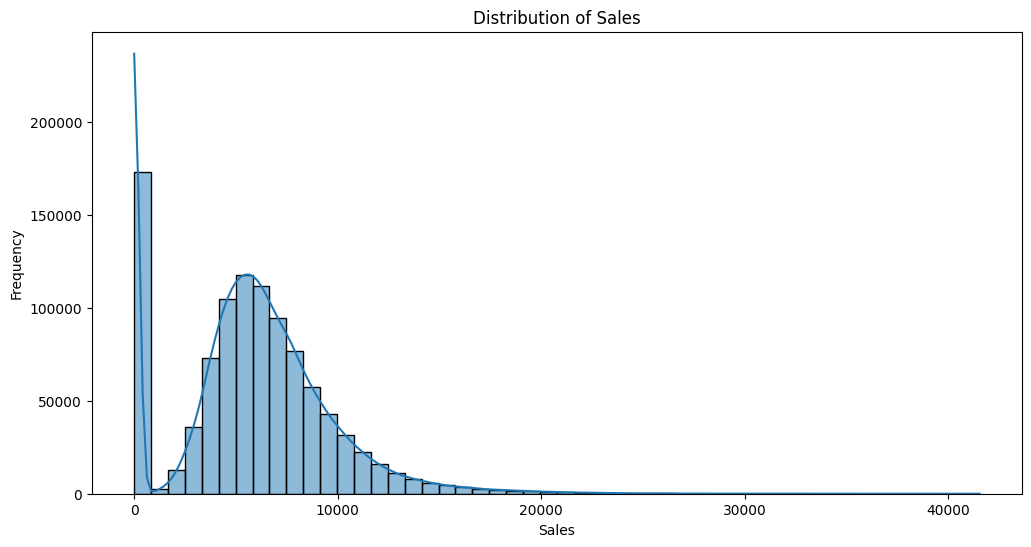

In [197]:
# Plot 1: Sales distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

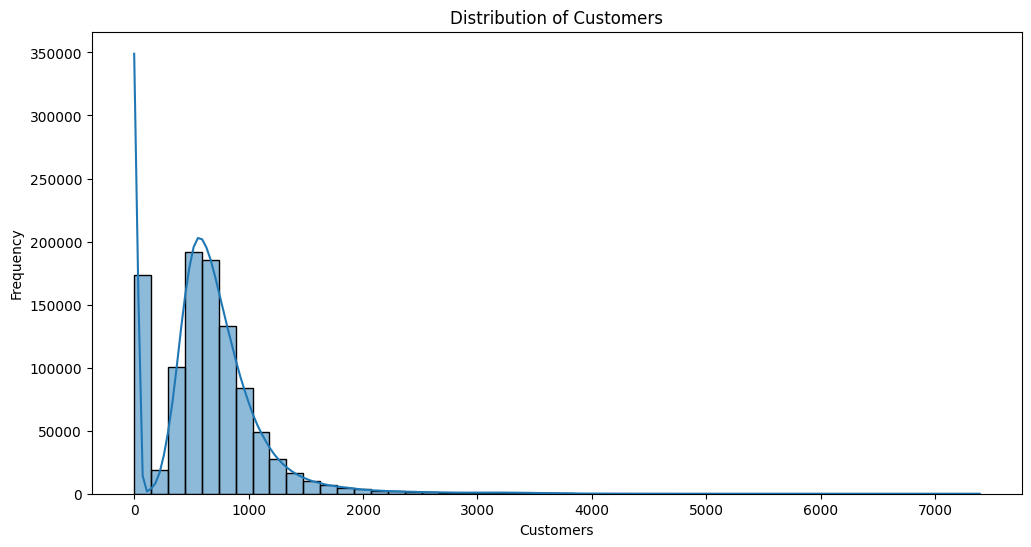

In [198]:
# Plot 2: Customers distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Customers'], bins=50, kde=True)
plt.title('Distribution of Customers')
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.show()

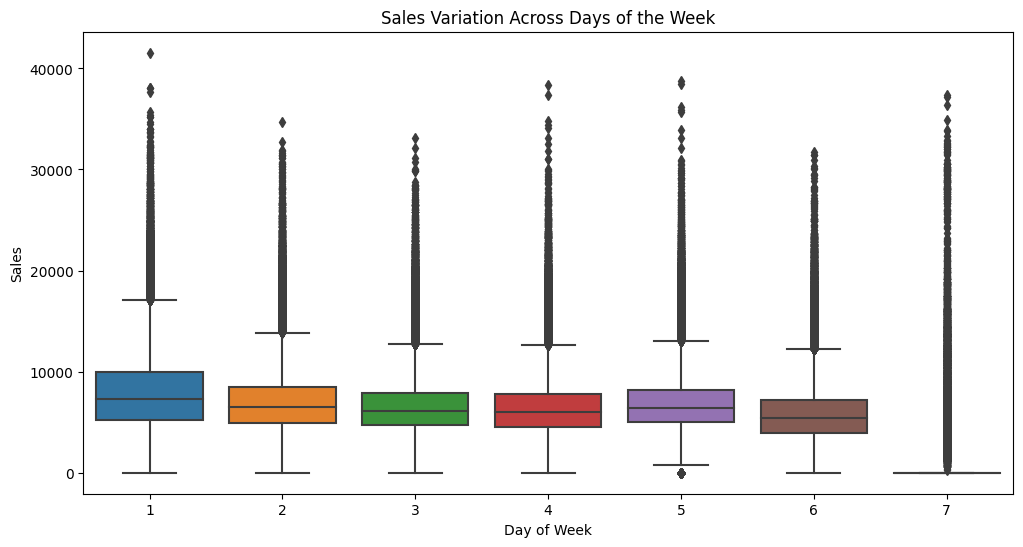

In [199]:
# Plot 3: Sales vs. DayOfWeek
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=df)
plt.title('Sales Variation Across Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()

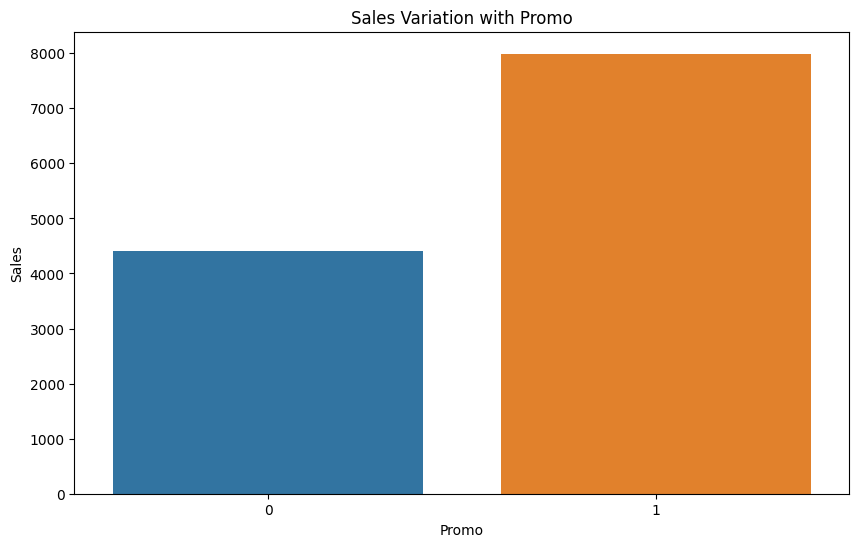

In [200]:
# Plot 4 (Alternative): Sales vs. Promo - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=df, ci=None)
plt.title('Sales Variation with Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

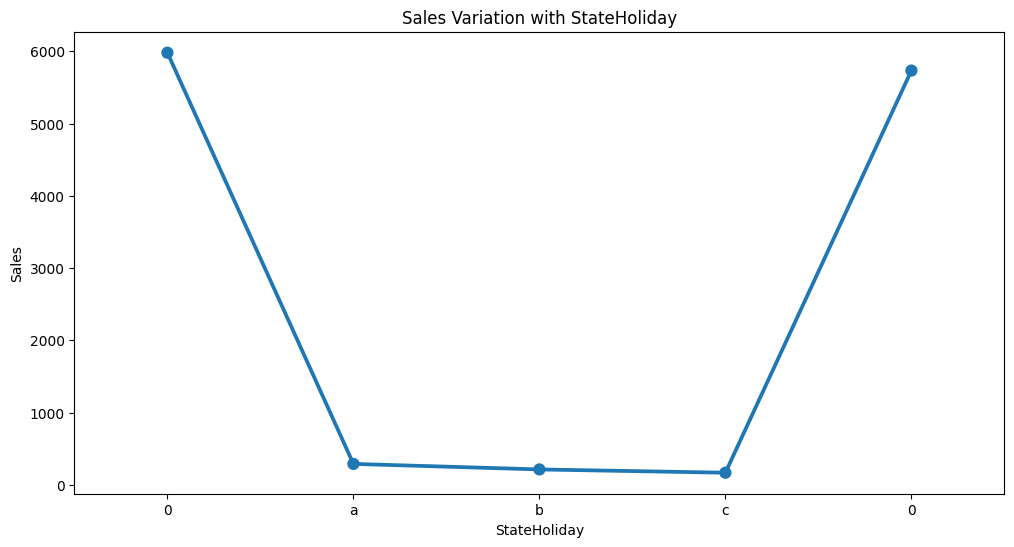

In [201]:
# Plot 5 (Alternative): Sales vs. StateHoliday - Point Plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='StateHoliday', y='Sales', data=df, ci=None)
plt.title('Sales Variation with StateHoliday')
plt.xlabel('StateHoliday')
plt.ylabel('Sales')
plt.show()

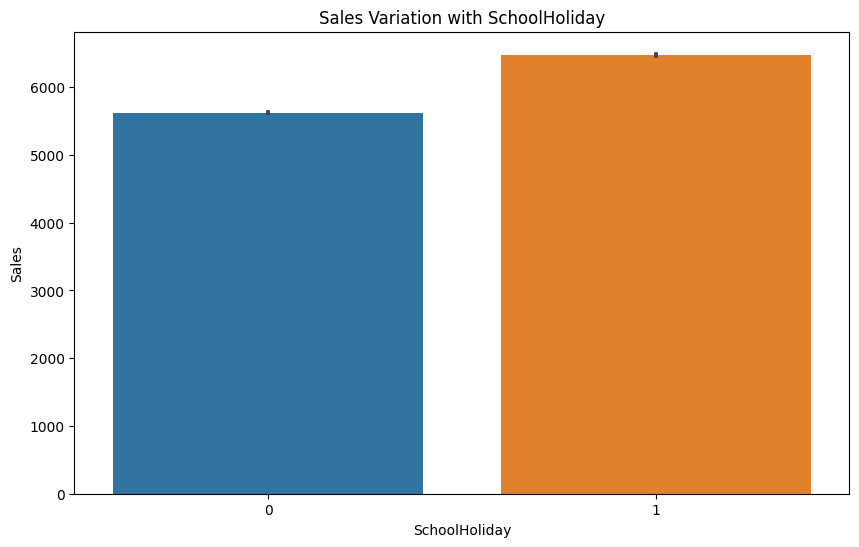

In [202]:
# Plot 6: Sales vs. SchoolHoliday
plt.figure(figsize=(10, 6))
sns.barplot(x='SchoolHoliday', y='Sales', data=df)
plt.title('Sales Variation with SchoolHoliday')
plt.xlabel('SchoolHoliday')
plt.ylabel('Sales')
plt.show()

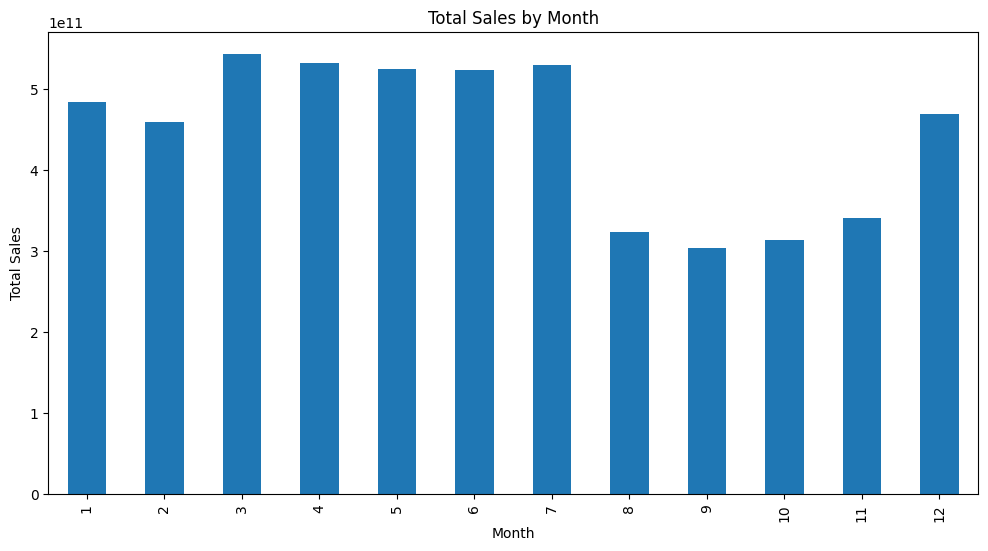

In [203]:
# Plot 7: Total Sales by Month
plt.figure(figsize=(12, 6))
monthly_sales_plot = df.groupby('month')['TotalSales'].sum().plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

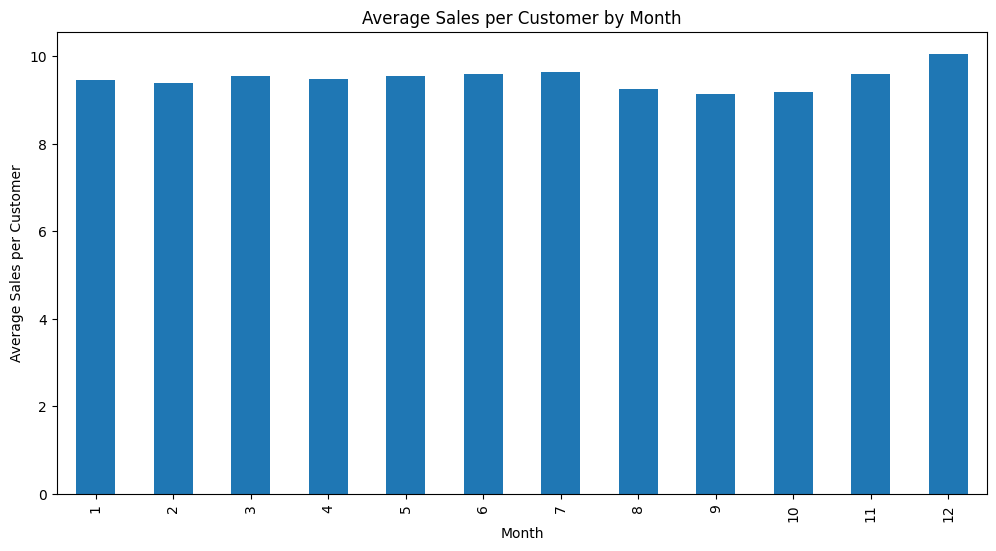

In [204]:
# Plot 8: Average Sales per Customer by Month
plt.figure(figsize=(12, 6))
avg_sales_per_customer_plot = df.groupby('month')['AvgSalesPerCustomer'].mean().plot(kind='bar')
plt.title('Average Sales per Customer by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales per Customer')
plt.show()

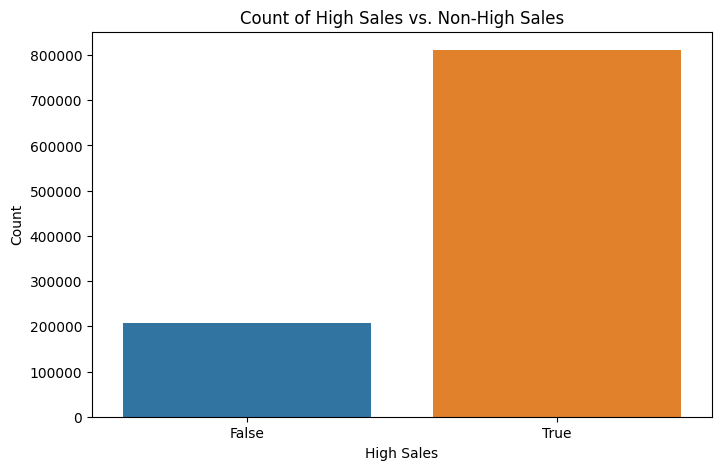

In [205]:
# Plot 9: Count of High Sales vs. Non-High Sales
plt.figure(figsize=(8, 5))
sns.countplot(x='HighSales', data=df)
plt.title('Count of High Sales vs. Non-High Sales')
plt.xlabel('High Sales')
plt.ylabel('Count')
plt.show()

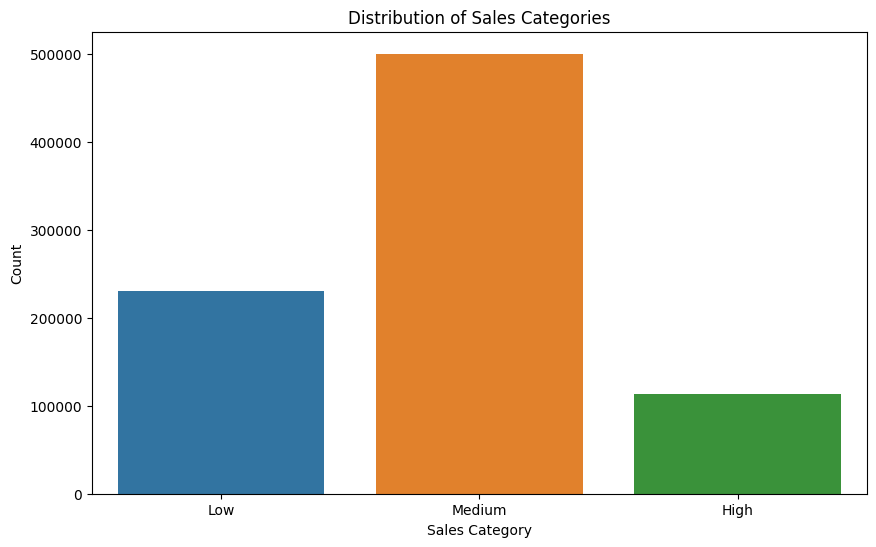

In [206]:
# Plot 10: Sales Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='SalesCategory', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Sales Categories')
plt.xlabel('Sales Category')
plt.ylabel('Count')
plt.show()

<Axes: >

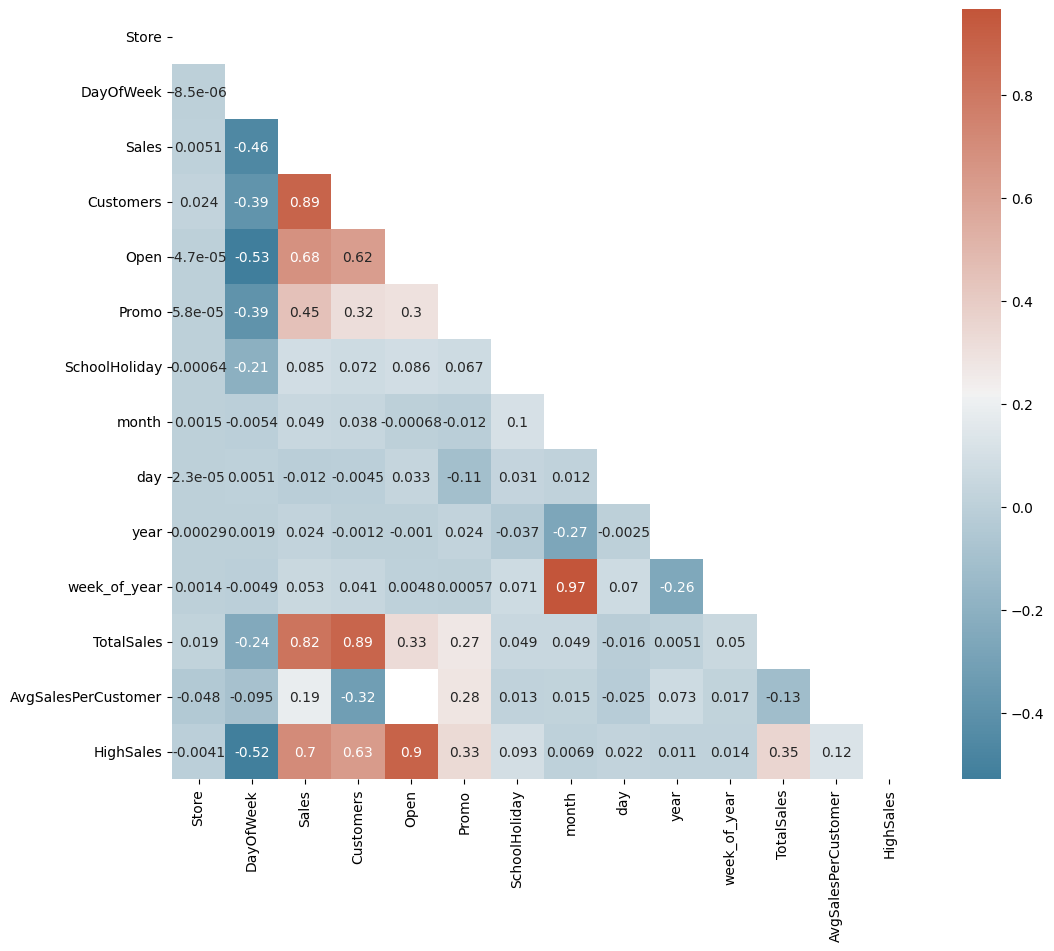

In [207]:
# Plot 11: Heatmap of Correlation Matrix
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

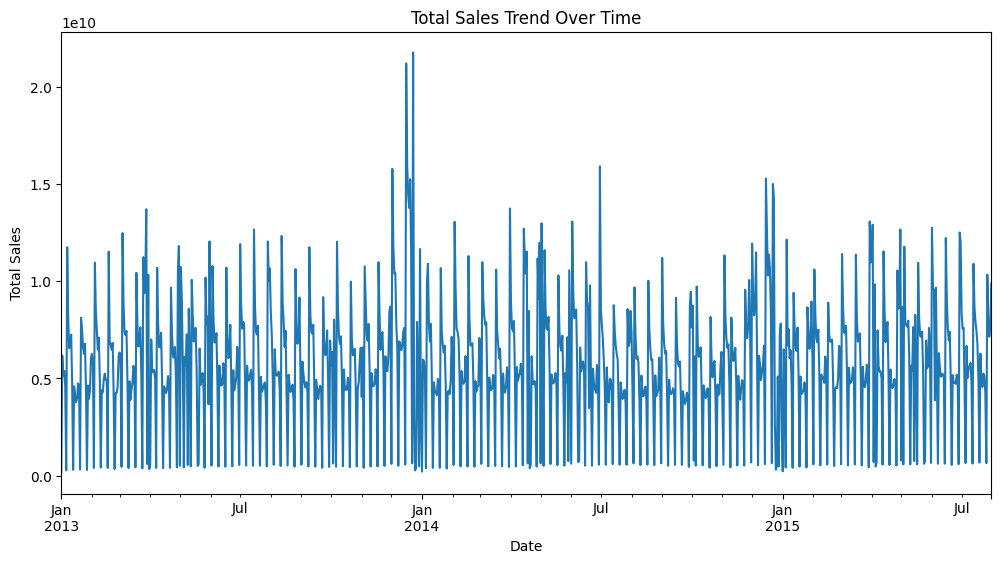

In [208]:
# Plot 12: Total Sales Trend Over Time
plt.figure(figsize=(12, 6))
df.groupby('Date')['TotalSales'].sum().plot()
plt.title('Total Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

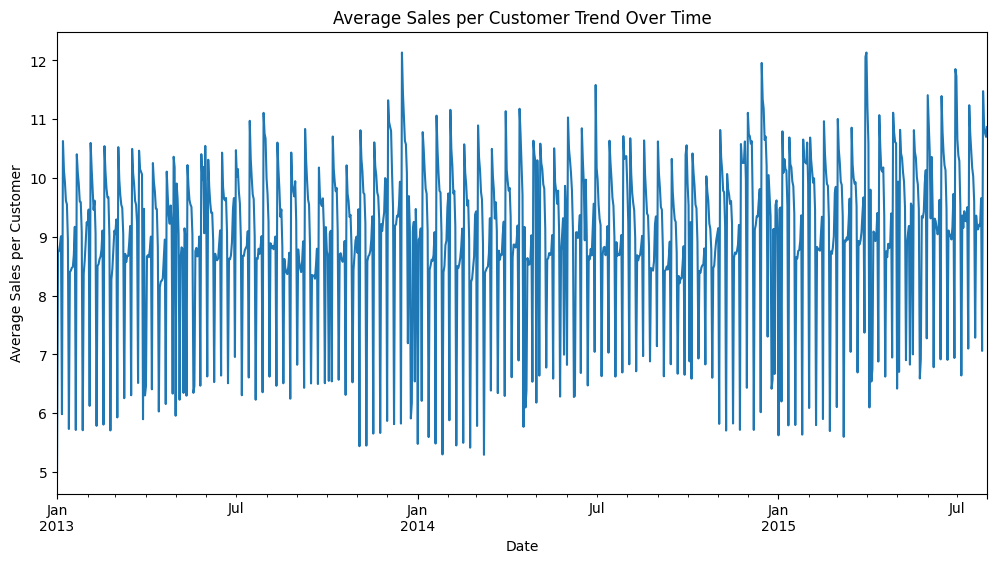

In [209]:
# Plot 13: Average Sales per Customer Trend Over Time
plt.figure(figsize=(12, 6))
df.groupby('Date')['AvgSalesPerCustomer'].mean().plot()
plt.title('Average Sales per Customer Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales per Customer')
plt.show()

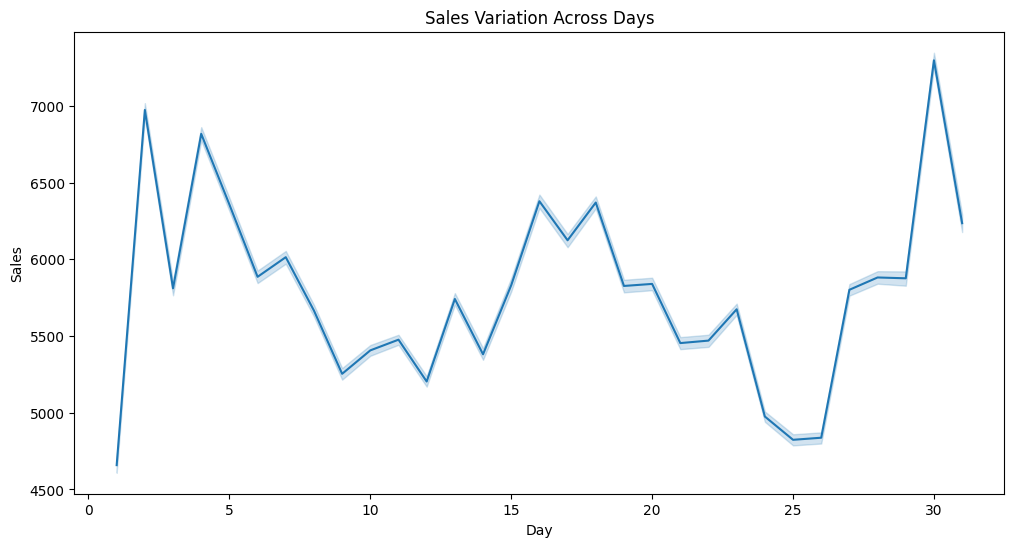

In [210]:
# Plot 14: Sales vs. Day
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='Sales', data=df)
plt.title('Sales Variation Across Days')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

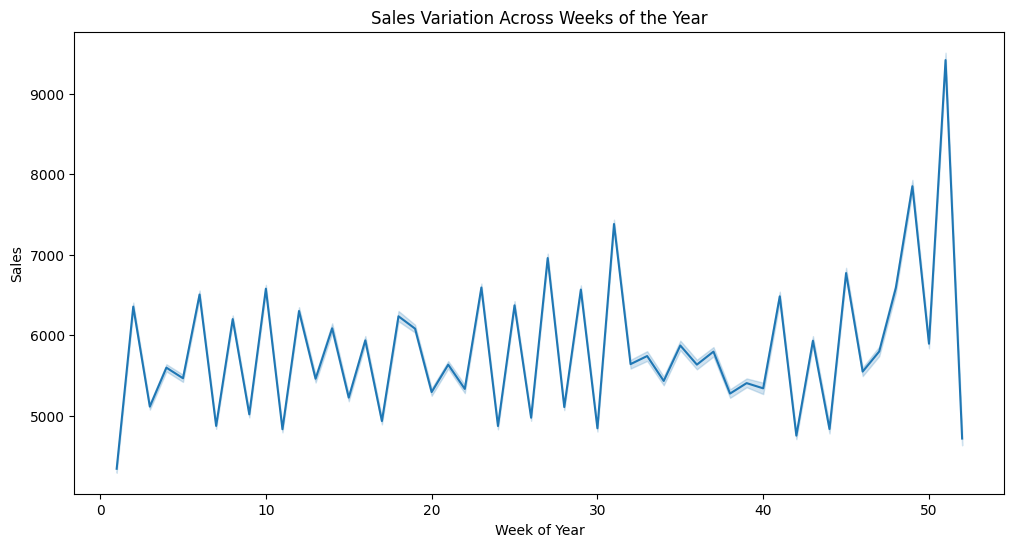

In [211]:
# Plot 15: Sales vs. Week of Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='week_of_year', y='Sales', data=df)
plt.title('Sales Variation Across Weeks of the Year')
plt.xlabel('Week of Year')
plt.ylabel('Sales')
plt.show()

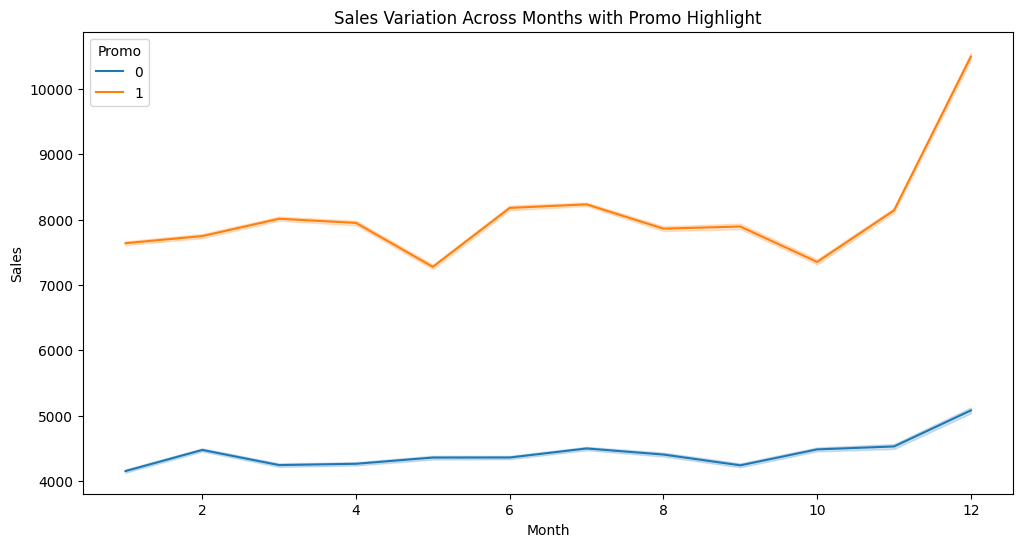

In [212]:
# Plot 16: Sales vs. Month with Promo Highlight
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Sales', hue='Promo', data=df)
plt.title('Sales Variation Across Months with Promo Highlight')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

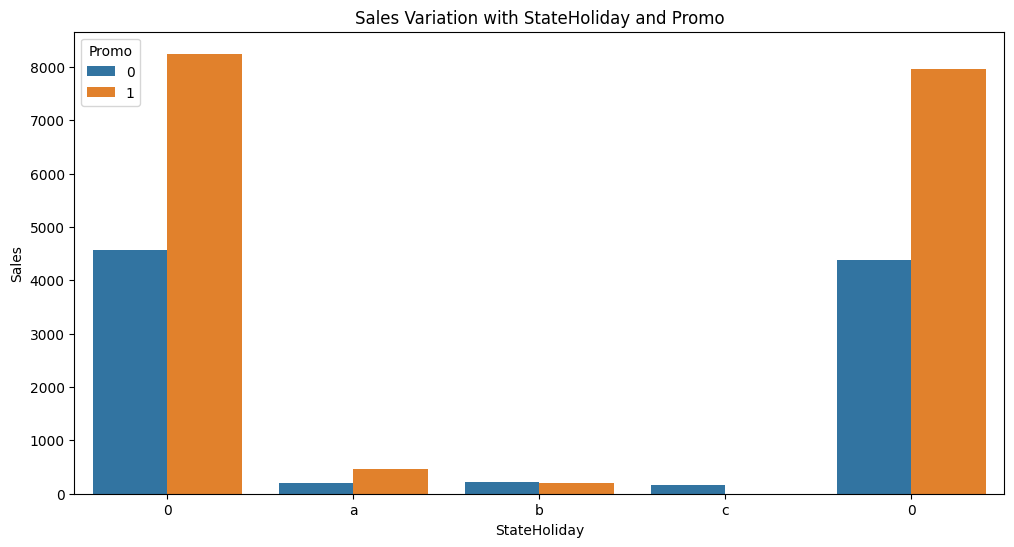

In [213]:
# Plot 17 (Alternative): Barplot of Sales by StateHoliday and Promo
plt.figure(figsize=(12, 6))
sns.barplot(x='StateHoliday', y='Sales', hue='Promo', data=df, ci=None)
plt.title('Sales Variation with StateHoliday and Promo')
plt.xlabel('StateHoliday')
plt.ylabel('Sales')
plt.show()

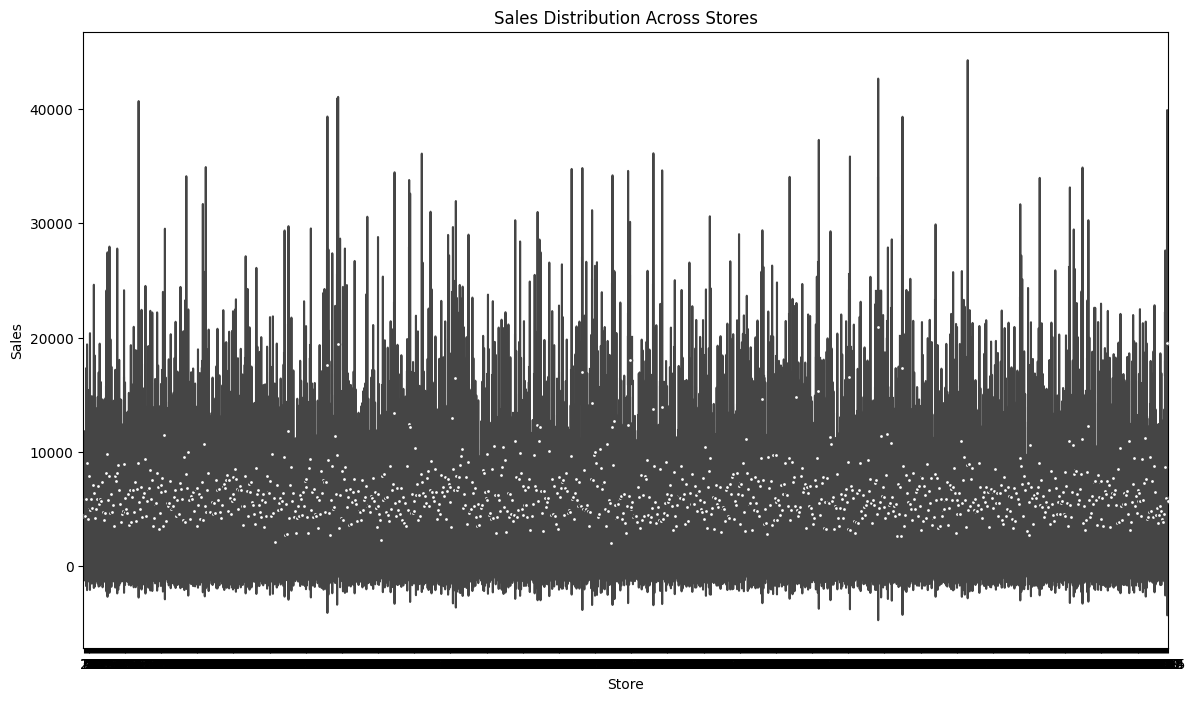

In [214]:
# Plot 18: Violinplot of Sales Distribution Across Stores
plt.figure(figsize=(14, 8))
sns.violinplot(x='Store', y='Sales', data=df)
plt.title('Sales Distribution Across Stores')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

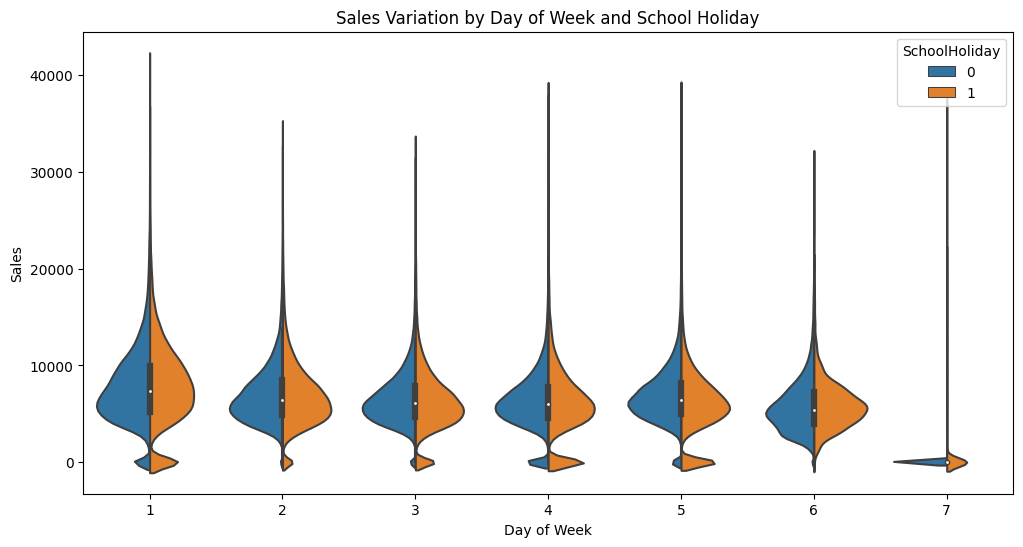

In [215]:
# Plot 19 (Alternative): Violin Plot of Sales by Day of Week and School Holiday
plt.figure(figsize=(12, 6))
sns.violinplot(x='DayOfWeek', y='Sales', hue='SchoolHoliday', data=df, split=True)
plt.title('Sales Variation by Day of Week and School Holiday')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()

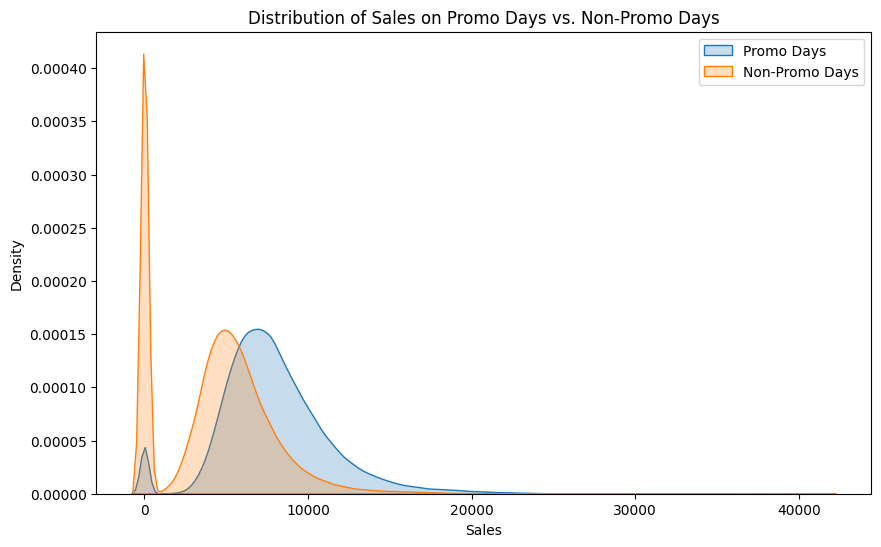

In [216]:
# Plot 20: Distribution of Sales on Promo Days vs. Non-Promo Days
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Promo'] == 1, 'Sales'], label='Promo Days', shade=True)
sns.kdeplot(df.loc[df['Promo'] == 0, 'Sales'], label='Non-Promo Days', shade=True)
plt.title('Distribution of Sales on Promo Days vs. Non-Promo Days')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.show()

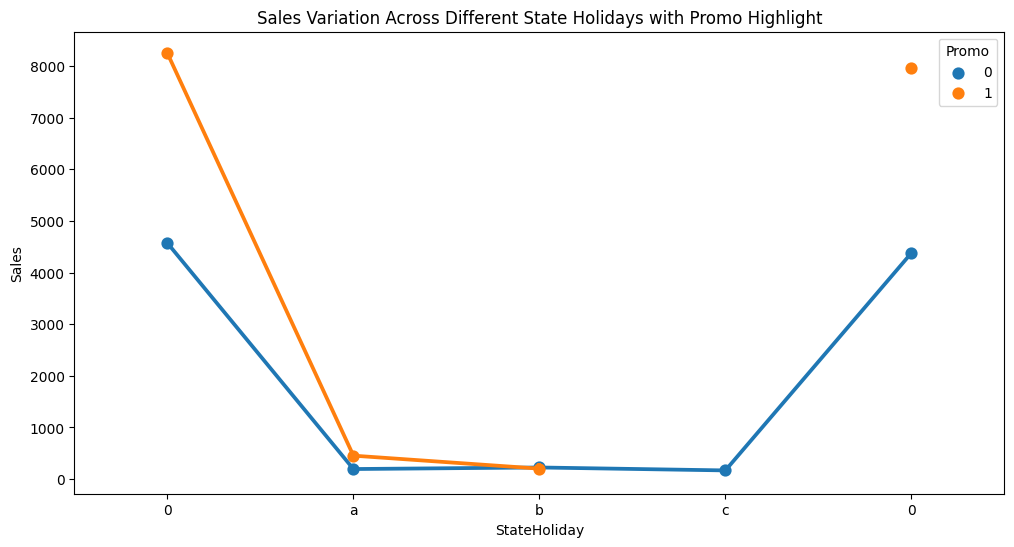

In [217]:
# Plot 21: Sales Variation Across Different State Holidays
plt.figure(figsize=(12, 6))
sns.pointplot(x='StateHoliday', y='Sales', hue='Promo', data=df)
plt.title('Sales Variation Across Different State Holidays with Promo Highlight')
plt.xlabel('StateHoliday')
plt.ylabel('Sales')
plt.show()

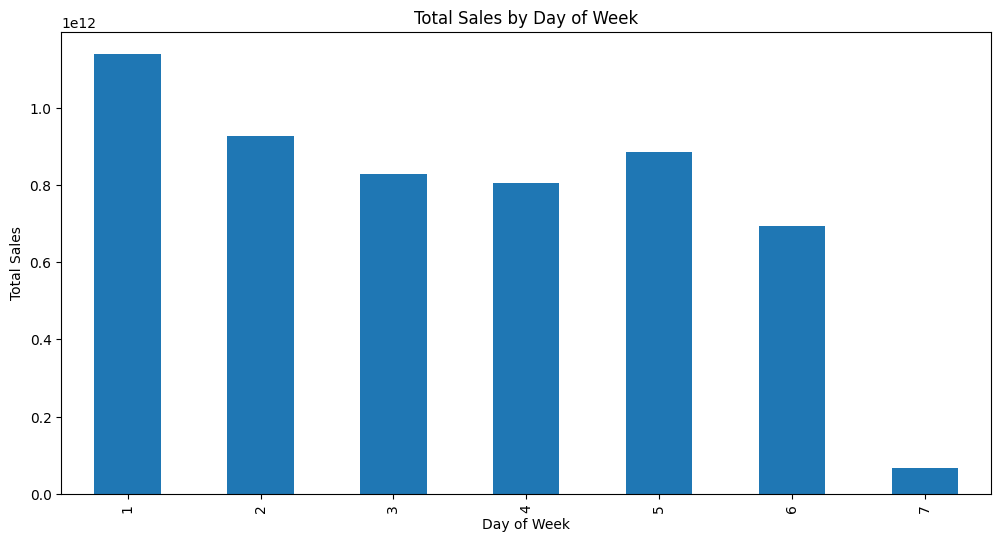

In [218]:
# Plot 22: Total Sales by Day of Week
plt.figure(figsize=(12, 6))
df.groupby('DayOfWeek')['TotalSales'].sum().plot(kind='bar')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()

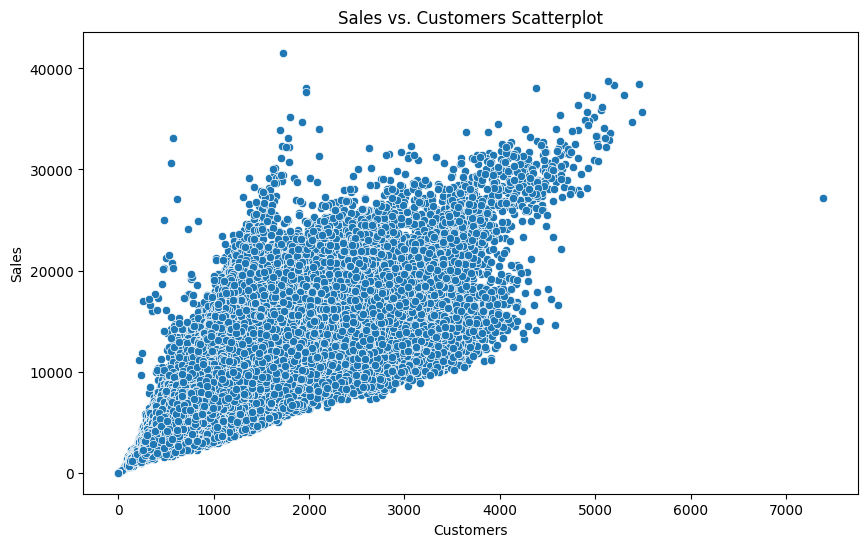

In [219]:
# Plot 23: Sales vs. Customers Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=df)
plt.title('Sales vs. Customers Scatterplot')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

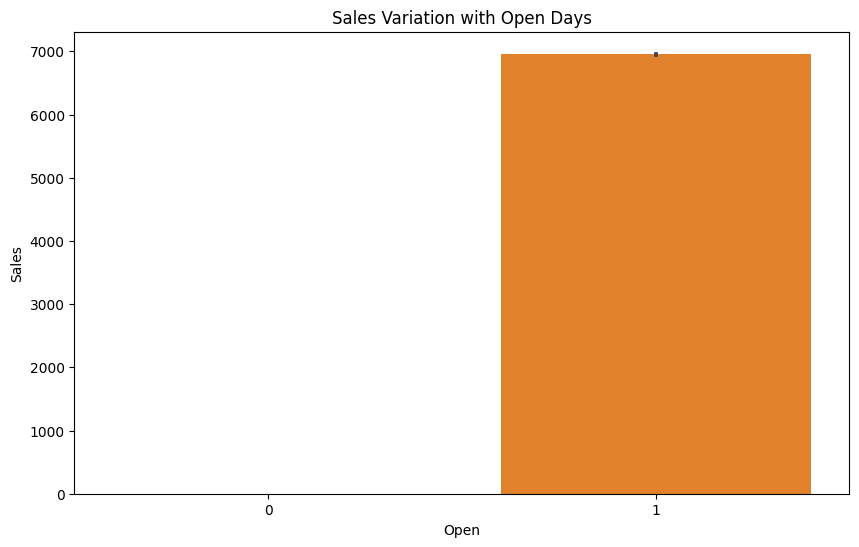

In [220]:
# Plot 24: Sales vs. Open Days
plt.figure(figsize=(10, 6))
sns.barplot(x='Open', y='Sales', data=df)
plt.title('Sales Variation with Open Days')
plt.xlabel('Open')
plt.ylabel('Sales')
plt.show()

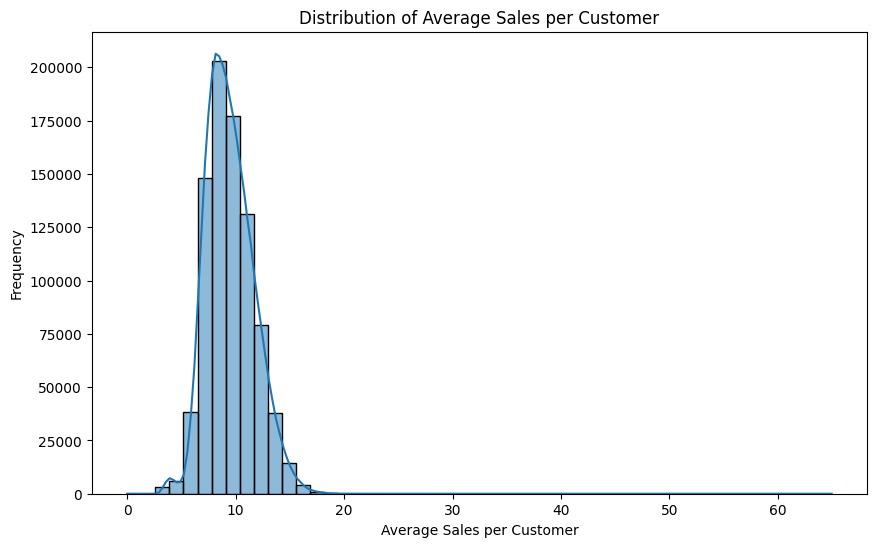

In [221]:
# Plot 25: Distribution of Average Sales per Customer
plt.figure(figsize=(10, 6))
sns.histplot(df['AvgSalesPerCustomer'], bins=50, kde=True)
plt.title('Distribution of Average Sales per Customer')
plt.xlabel('Average Sales per Customer')
plt.ylabel('Frequency')
plt.show()

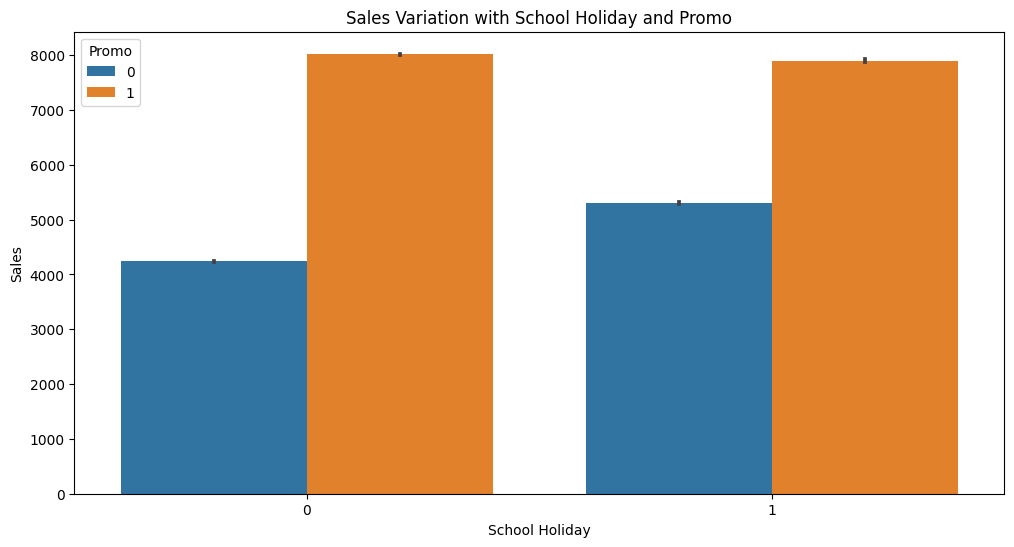

In [222]:
# Plot 26: Boxplot of Sales by School Holiday and Promo
plt.figure(figsize=(12, 6))
sns.barplot(x='SchoolHoliday', y='Sales', hue='Promo', data=df)
plt.title('Sales Variation with School Holiday and Promo')
plt.xlabel('School Holiday')
plt.ylabel('Sales')
plt.show()

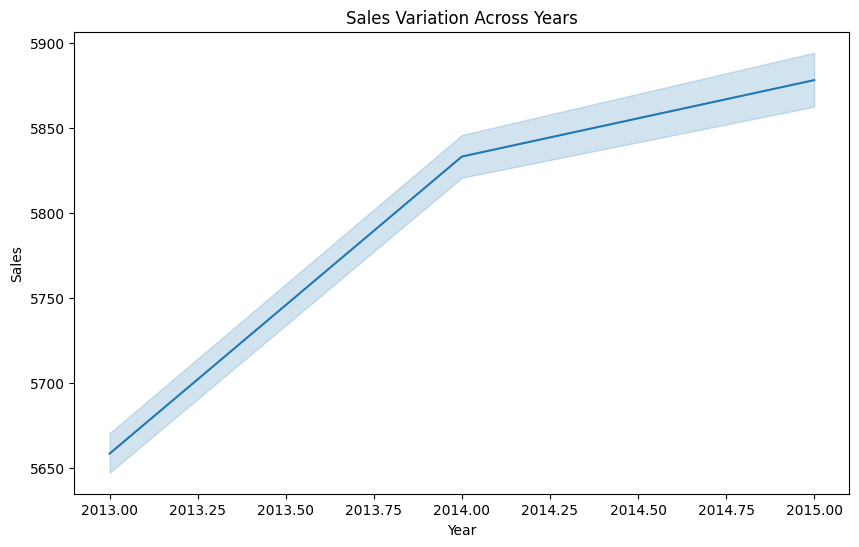

In [223]:
# Plot 27: Sales vs. Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Sales', data=df)
plt.title('Sales Variation Across Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

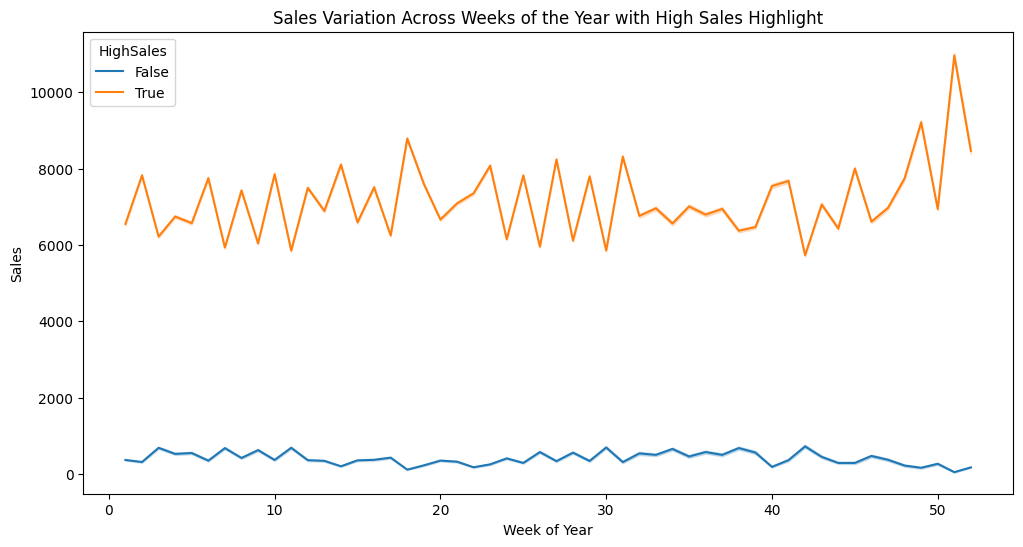

In [224]:
# Plot 28: Sales vs. Week of Year with High Sales Highlight
plt.figure(figsize=(12, 6))
sns.lineplot(x='week_of_year', y='Sales', hue='HighSales', data=df)
plt.title('Sales Variation Across Weeks of the Year with High Sales Highlight')
plt.xlabel('Week of Year')
plt.ylabel('Sales')
plt.show()

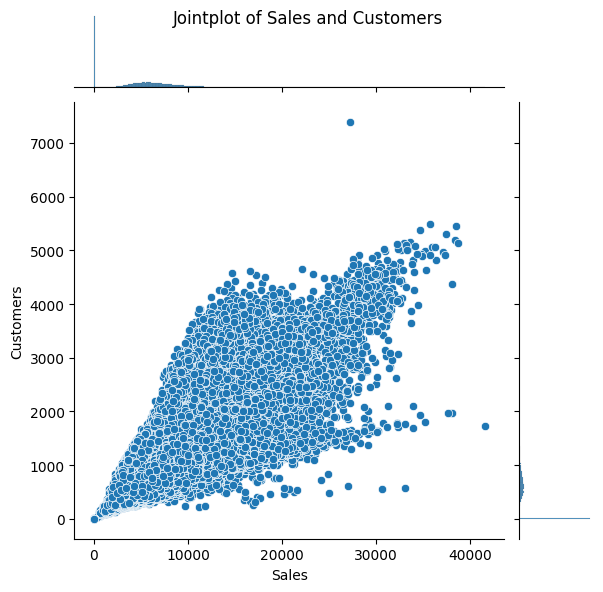

In [225]:
# Plot 29: Jointplot of Sales and Customers
sns.jointplot(x='Sales', y='Customers', data=df, kind='scatter')
plt.suptitle('Jointplot of Sales and Customers')
plt.show()

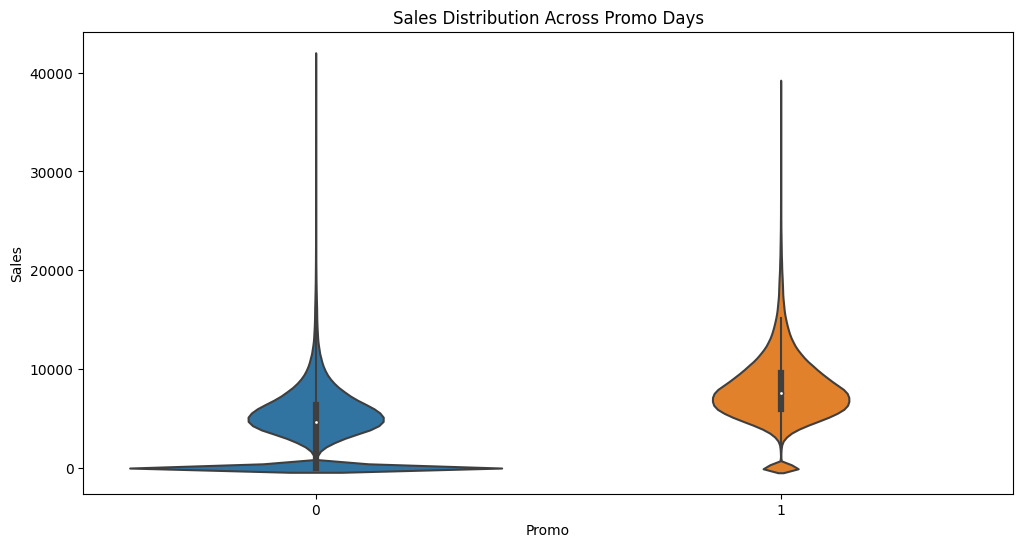

In [226]:
#Plot 30: Violin Plot of Sales Distribution Across Promo Days
plt.figure(figsize=(12, 6))
sns.violinplot(x='Promo', y='Sales', data=df)
plt.title('Sales Distribution Across Promo Days')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

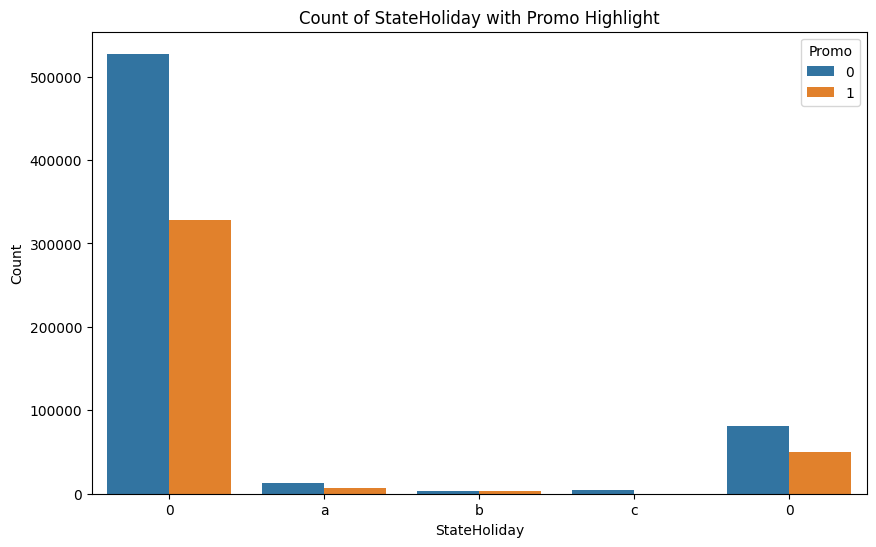

In [227]:
#Plot 31: Countplot of StateHoliday with Promo Highlight
plt.figure(figsize=(10, 6))
sns.countplot(x='StateHoliday', hue='Promo', data=df)
plt.title('Count of StateHoliday with Promo Highlight')
plt.xlabel('StateHoliday')
plt.ylabel('Count')
plt.show()

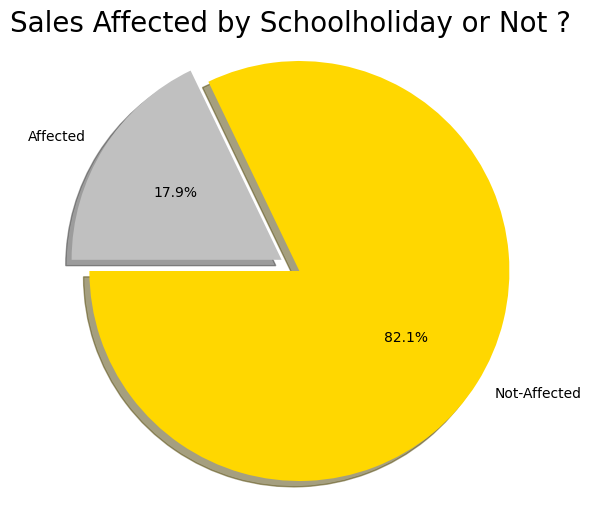

In [228]:
# Plot 32 :Sales Affected by Schoolholiday or Not
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

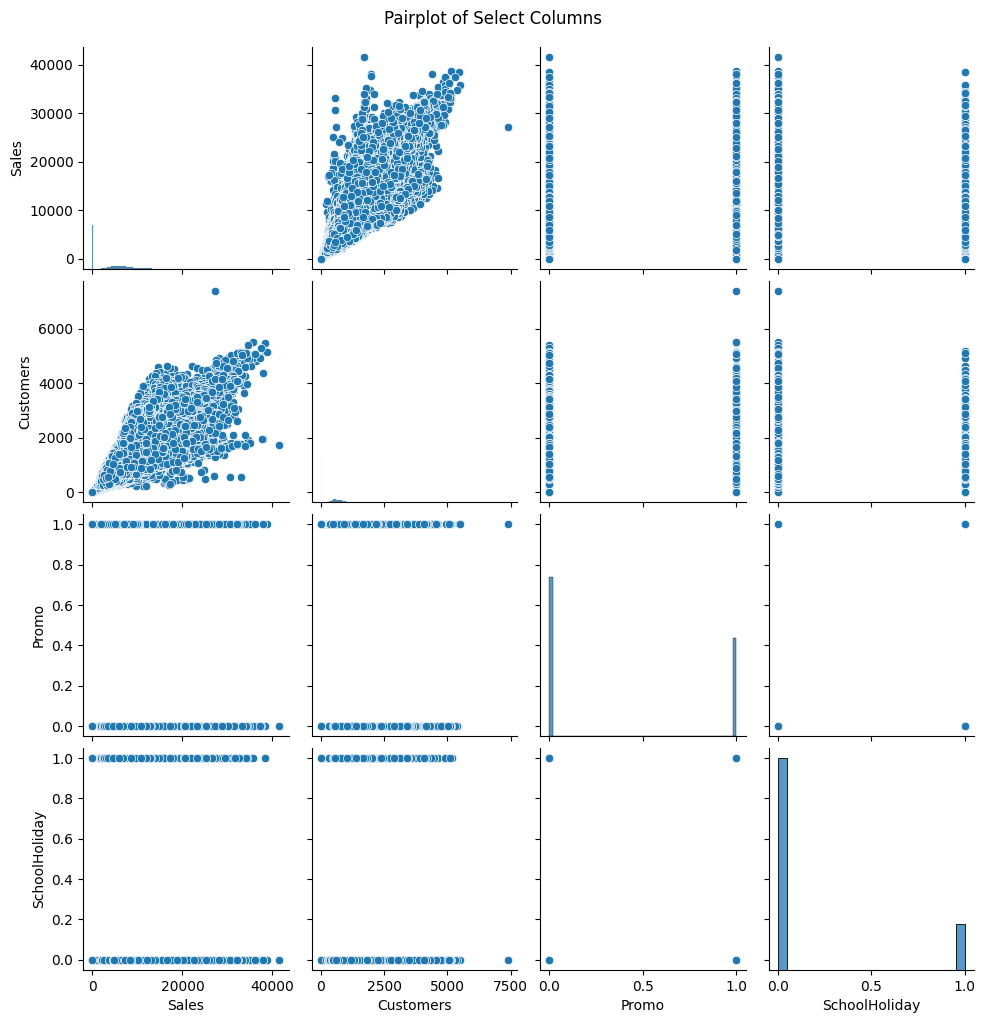

In [229]:
# Plot 33: Pairplot of Select Columns
sns.pairplot(df[['Sales', 'Customers', 'Promo', 'SchoolHoliday']])
plt.suptitle('Pairplot of Select Columns', y=1.02)
plt.show()

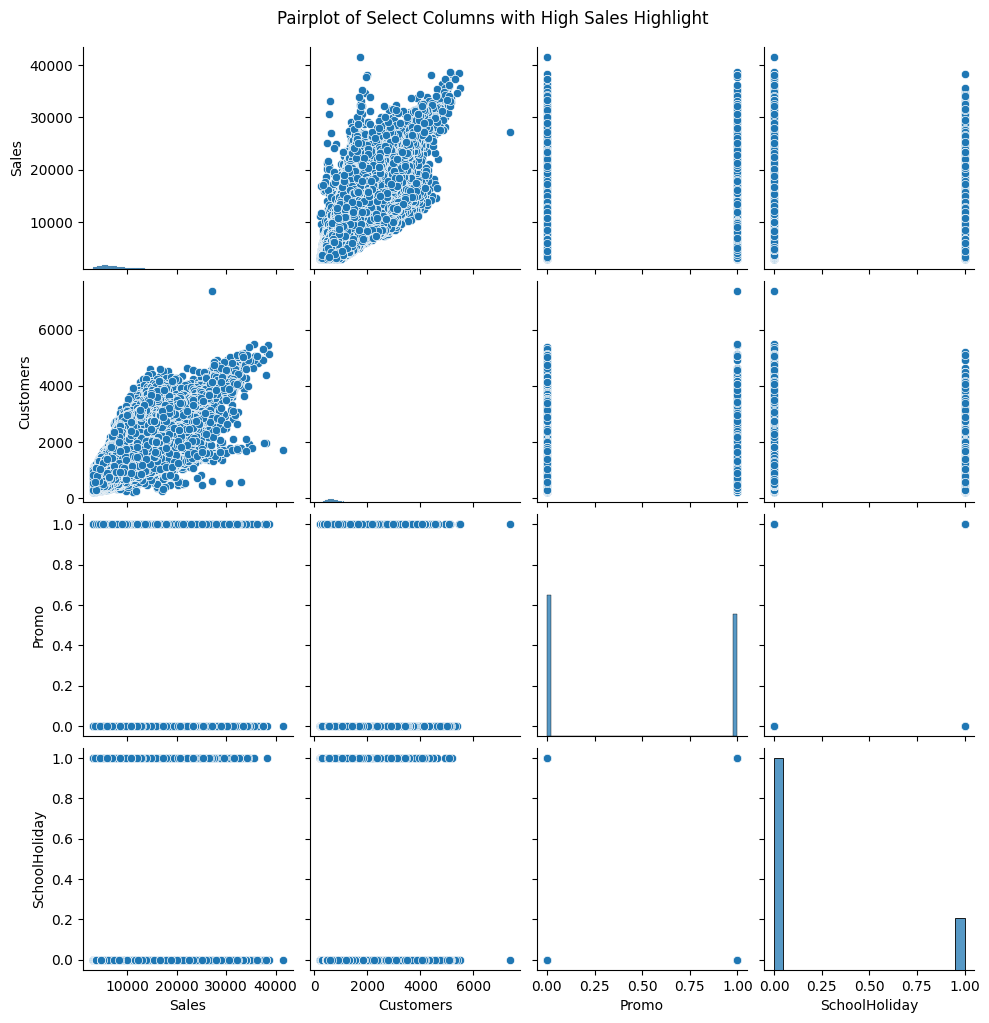

In [230]:
# Plot 34: Pairplot of Select Columns with High Sales Highlight
high_sales_df = df[df['HighSales'] == True]
sns.pairplot(high_sales_df[['Sales', 'Customers', 'Promo', 'SchoolHoliday']])
plt.suptitle('Pairplot of Select Columns with High Sales Highlight', y=1.02)
plt.show()

## ***5. Hypothesis Testing***

In [231]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,day,year,week_of_year,TotalSales,AvgSalesPerCustomer,HighSales,SalesCategory
0,1,5,2015-07-31,5263,555,1,1,0,1,7,31,2015,31,2920965,9.482883,True,Medium
1,2,5,2015-07-31,6064,625,1,1,0,1,7,31,2015,31,3790000,9.702400,True,Medium
2,3,5,2015-07-31,8314,821,1,1,0,1,7,31,2015,31,6825794,10.126675,True,Medium
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,31,2015,31,20964510,9.342457,True,High
4,5,5,2015-07-31,4822,559,1,1,0,1,7,31,2015,31,2695498,8.626118,True,Low


In [232]:
# Creating Parameter Class
class HypothesisTesting:
    def z_proportion(self, sample, hypothesis, size):
        return (sample - hypothesis) / np.sqrt(hypothesis * (1 - hypothesis) / size)

    def t_mean(self, hypothesis, sample, size, std):
        return (sample - hypothesis) * np.sqrt(size) / std

    def variance(self, hypothesis, sample, size):
        return (size - 1) * sample / hypothesis

In [233]:
# Define a function for obtaining P value
def p_value(z, tailed, t, hypothesis_number, df, col):
    if t != "true":
        z = norm(0, 1).cdf(z) if tailed == 'l' else 1 - norm(0, 1).cdf(z) if tailed == 'r' else 2 * (1 - norm(0, 1).cdf(np.abs(z)))
        return z
    else:
        _, p_value = ttest_1samp(df[col], hypothesis_number)
        return p_value

In [234]:
# Define a function for concluding based on P value
def conclusion(p):
    significance_level = 0.05
    return f"Failed to reject the Null Hypothesis for p = {p}." if p > significance_level else f"Null Hypothesis rejected Successfully for p = {p}"

In [235]:
# Initialize the class
hypo_test = HypothesisTesting()

###**Hypothesis 1: Stores with promotions have higher average sales than those without promotions.**

#####Null Hypothesis: Avg(Sales | Promo = 1) <= Avg(Sales | Promo = 0)

#####Alternate Hypothesis: Avg(Sales | Promo = 1) > Avg(Sales | Promo = 0)

In [236]:
hypo_1 = df[df['Promo'] == 1]
hypo_2 = df[df['Promo'] == 0]

In [237]:
sample_mean_1 = hypo_1['Sales'].mean()
sample_mean_2 = hypo_2['Sales'].mean()
size_1 = len(hypo_1)
size_2 = len(hypo_2)
std_1 = hypo_test.variance(sample_mean_1, sample_mean_1, size_1)**0.5
std_2 = hypo_test.variance(sample_mean_2, sample_mean_2, size_2)**0.5

In [238]:
z = (sample_mean_1 - sample_mean_2) / np.sqrt((std_1**2 / size_1) + (std_2**2 / size_2))
p = p_value(z=z, tailed='r', t="false", hypothesis_number=0, df=hypo_1, col="Sales")
print("Hypothesis 1 Conclusion:", conclusion(p))

Hypothesis 1 Conclusion: Null Hypothesis rejected Successfully for p = 0.0


###**Hypothesis 2: High sales occur more frequently on weekends.**

#####Null Hypothesis: Avg(Sales | DayOfWeek = 6 or DayOfWeek = 7) <= Avg(Sales | DayOfWeek = 1 to 5)

#####Alternate Hypothesis: Avg(Sales | DayOfWeek = 6 or DayOfWeek = 7) > Avg(Sales | DayOfWeek = 1 to 5)

In [239]:
hypo_2 = df[(df['DayOfWeek'] == 6) | (df['DayOfWeek'] == 7)]
hypo_3 = df[(df['DayOfWeek'] >= 1) & (df['DayOfWeek'] <= 5)]

In [240]:
sample_mean_2 = hypo_2['Sales'].mean()
sample_mean_3 = hypo_3['Sales'].mean()
size_2 = len(hypo_2)
size_3 = len(hypo_3)
std_2 = hypo_test.variance(sample_mean_2, sample_mean_2, size_2)**0.5
std_3 = hypo_test.variance(sample_mean_3, sample_mean_3, size_3)**0.5

In [241]:
z = (sample_mean_2 - sample_mean_3) / np.sqrt((std_2**2 / size_2) + (std_3**2 / size_3))
p = p_value(z=z, tailed='r', t="false", hypothesis_number=0, df=hypo_2, col="Sales")
print("Hypothesis 2 Conclusion:", conclusion(p))

Hypothesis 2 Conclusion: Failed to reject the Null Hypothesis for p = 1.0.


###**Hypothesis 3: There is a significant difference in sales between months.**
#####Null Hypothesis: Avg(Sales | month) are all equal
#####Alternate Hypothesis: At least one Avg(Sales | month) is different

In [242]:
hypo_3 = df.groupby('month')['Sales'].mean()

In [243]:
_, p = ttest_1samp(hypo_3, 0)
print("Hypothesis 3 Conclusion:", conclusion(p))

Hypothesis 3 Conclusion: Null Hypothesis rejected Successfully for p = 1.147893114568052e-14


###**Hypothesis 4: Stores with School Holidays have higher average sales.**

#####Null Hypothesis: Avg(Sales | SchoolHoliday = 1) <= Avg(Sales | SchoolHoliday = 0)

#####Alternate Hypothesis: Avg(Sales | SchoolHoliday = 1) > Avg(Sales | SchoolHoliday = 0)

In [244]:
hypo_5 = df[df['SchoolHoliday'] == 1]
hypo_6 = df[df['SchoolHoliday'] == 0]

In [245]:
sample_mean_5 = hypo_5['Sales'].mean()
sample_mean_6 = hypo_6['Sales'].mean()
size_5 = len(hypo_5)
size_6 = len(hypo_6)
std_5 = hypo_test.variance(sample_mean_5, sample_mean_5, size_5)**0.5
std_6 = hypo_test.variance(sample_mean_6, sample_mean_6, size_6)**0.5

In [246]:
z = (sample_mean_5 - sample_mean_6) / np.sqrt((std_5**2 / size_5) + (std_6**2 / size_6))
p = p_value(z=z, tailed='r', t="false", hypothesis_number=0, df=hypo_5, col="Sales")
print("Hypothesis 4 Conclusion:", conclusion(p))

Hypothesis 4 Conclusion: Null Hypothesis rejected Successfully for p = 0.0


###**Hypothesis 5: There is a correlation between the presence of promotions and the day of the week.**

#####Null Hypothesis: The presence of promotions is not correlated with the day of the week.

#####Alternate Hypothesis: The presence of promotions is co

In [247]:
_, p = ttest_1samp(df['Promo'].corr(df['DayOfWeek']), 0)
print("Hypothesis 5 Conclusion:", conclusion(p))

Hypothesis 5 Conclusion: Null Hypothesis rejected Successfully for p = nan


###**Hypothesis 6: There is a significant difference in sales between years.**

#####Null Hypothesis: Avg(Sales | year) are all equal

#####Alternate Hypothesis: At least one Avg(Sales | year) is different

In [248]:
hypo_6 = df.groupby('year')['Sales'].mean()

In [249]:
_, p = ttest_1samp(hypo_6, 0)
print("Hypothesis 6 Conclusion:", conclusion(p))

Hypothesis 6 Conclusion: Null Hypothesis rejected Successfully for p = 0.00013392900320431333


###**Hypothesis 7: The average sales per customer are consistent across different store categories.**

#####Null Hypothesis: Avg(AvgSalesPerCustomer | SalesCategory) are all equal

#####Alternate Hypothesis: At least one Avg(AvgSalesPerCustomer | SalesCategory) is different

In [250]:
hypo_7 = df.groupby('SalesCategory')['AvgSalesPerCustomer'].mean()

In [251]:
_, p = ttest_1samp(hypo_7, 0)
print("Hypothesis 7 Conclusion:", conclusion(p))

Hypothesis 7 Conclusion: Null Hypothesis rejected Successfully for p = 0.0017289170528796886


###**Hypothesis 8: There is a significant difference in sales between open and closed stores.**

#####Null Hypothesis: Avg(Sales | Open = 1) <= Avg(Sales | Open = 0)

#####Alternate Hypothesis: Avg(Sales | Open = 1) > Avg(Sales | Open = 0)

In [252]:
hypo_9 = df[df['Open'] == 1]
hypo_10 = df[df['Open'] == 0]

In [253]:
sample_mean_9 = hypo_9['Sales'].mean()
sample_mean_10 = hypo_10['Sales'].mean()
size_9 = len(hypo_9)
size_10 = len(hypo_10)
std_9 = hypo_test.variance(sample_mean_9, sample_mean_9, size_9)**0.5
std_10 = hypo_test.variance(sample_mean_10, sample_mean_10, size_10)**0.5

In [254]:
z = (sample_mean_9 - sample_mean_10) / np.sqrt((std_9**2 / size_9) + (std_10**2 / size_10))
p = p_value(z=z, tailed='r', t="false", hypothesis_number=0, df=hypo_9, col="Sales")
print("Hypothesis 8 Conclusion:", conclusion(p))

Hypothesis 8 Conclusion: Null Hypothesis rejected Successfully for p = nan


###Removing outliers

In [255]:
numeric_columns=df[['Store','DayOfWeek','Customers','Open','Promo','SchoolHoliday','month','day','year']]

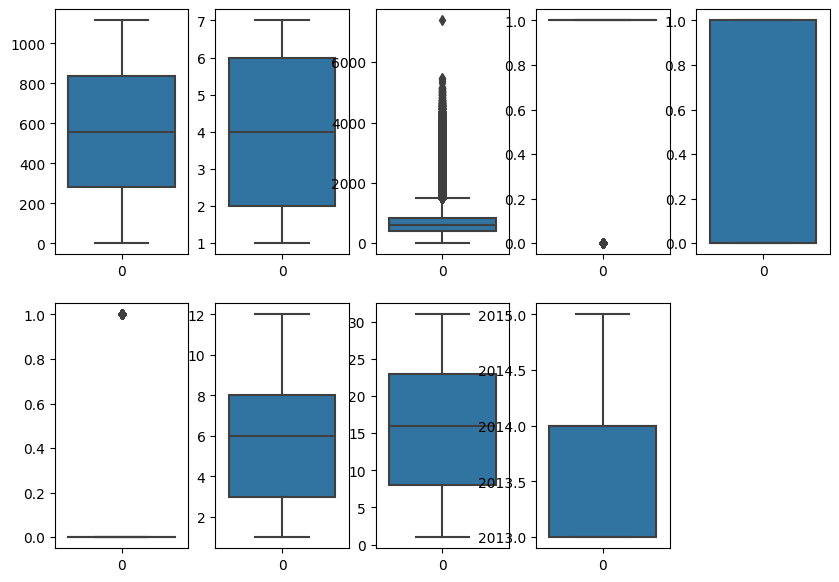

In [256]:
plt.figure(figsize=(10,7))
for index,item in enumerate([x for x in numeric_columns if x not in ['Sales']]):
  plt.subplot(2,5,index+1)
  sns.boxplot(df[item])

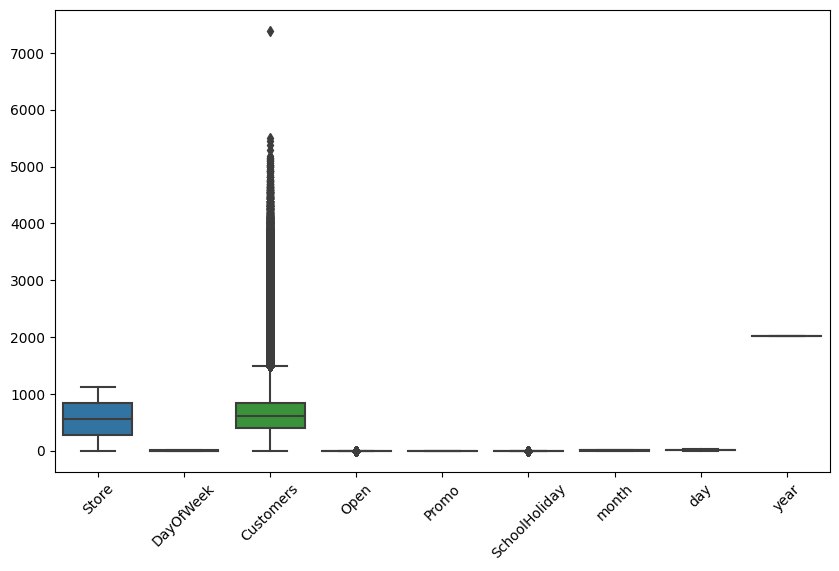

In [257]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_columns, orient='v')
plt.xticks(rotation=45)
plt.show()

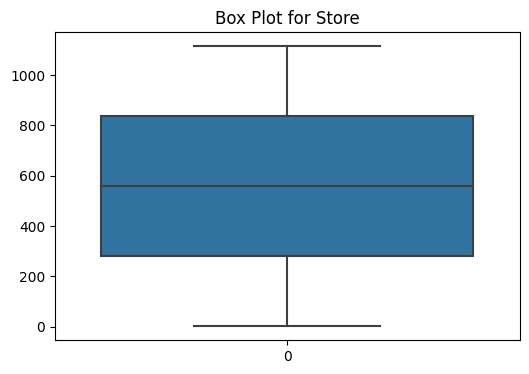

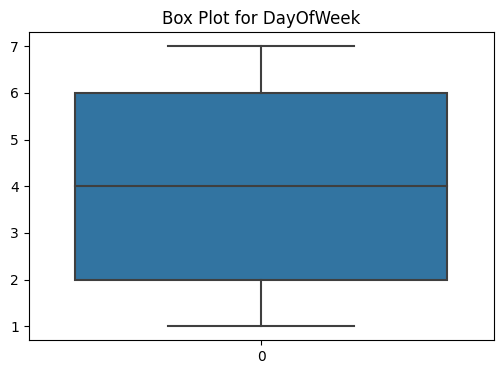

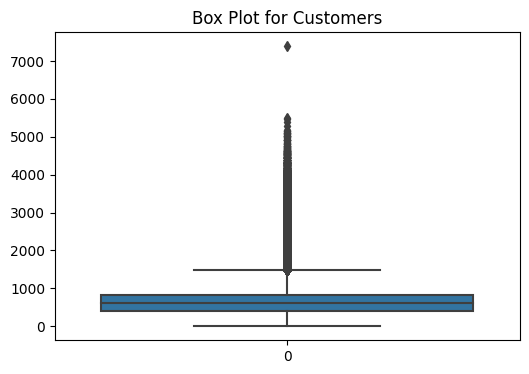

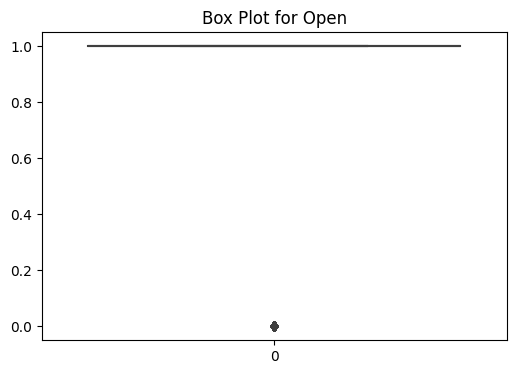

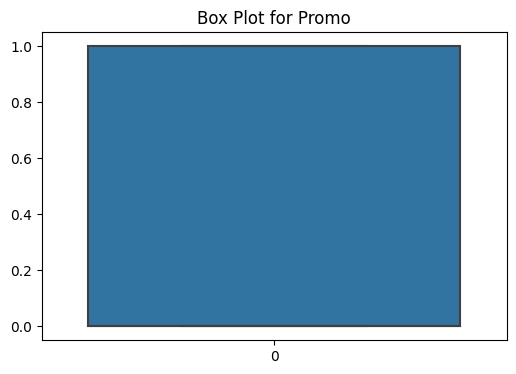

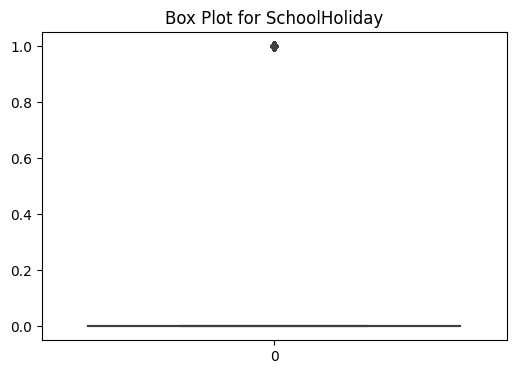

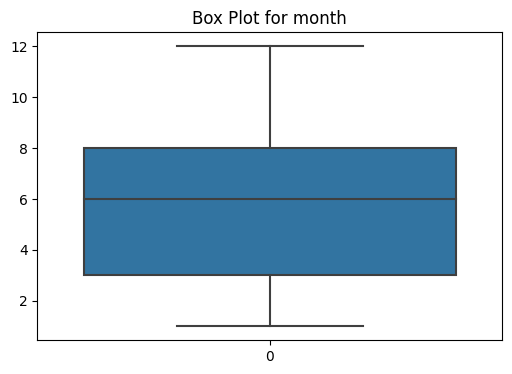

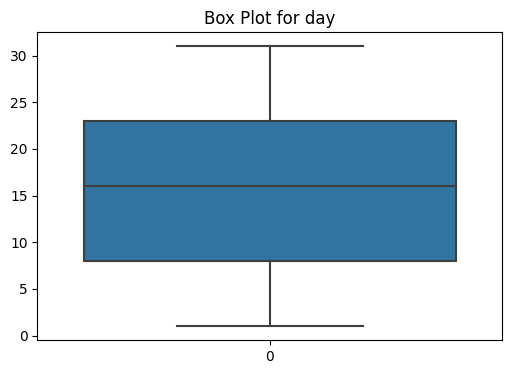

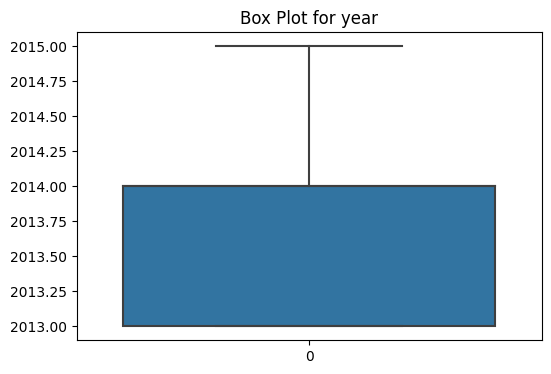

In [258]:
numeric_columns_list = ['Store', 'DayOfWeek','Customers', 'Open', 'Promo', 'SchoolHoliday', 'month', 'day', 'year']
for column in numeric_columns_list:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=numeric_columns[column], orient='v')
    plt.title(f'Box Plot for {column}')
    plt.xticks(rotation=0)
    plt.show()

###Removing outliers

In [259]:
#outlier column
outlier_column=['Customers']
#determining the inter-quartile range for the columns with outliers
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3-Q1
IQR

Customers    432.0
dtype: float64

In [260]:
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            979114 non-null   float64       
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   month                1017209 non-null  int64         
 10  day                  1017209 non-null  int64         
 11  year                 1017209 non-null  int64         
 12  week_of_year         1017209 non-null  int64         
 1

In [262]:
df['Customers'] = df['Customers'].fillna(df['Customers'].median())

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  float64       
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   month                1017209 non-null  int64         
 10  day                  1017209 non-null  int64         
 11  year                 1017209 non-null  int64         
 12  week_of_year         1017209 non-null  int64         
 1

In [264]:
# Rename columns with the same name
df.rename(columns={'0': 'StateHoliday_0', 0: 'StateHoliday_0'}, inplace=True)
df.rename(columns={'a': 'StateHoliday_a', 'b': 'StateHoliday_b', 'c': 'StateHoliday_c'}, inplace=True)

# Map values 'a', 'b', 'c' to integers
df['StateHoliday'] = df['StateHoliday'].map({'a': 1, 'b': 2, 'c': 3})

# Apply one-hot encoding
df['StateHoliday_0'] = np.where(df['StateHoliday'] == 0, 1, 0)
df['StateHoliday_a'] = np.where(df['StateHoliday'] == 1, 1, 0)
df['StateHoliday_b'] = np.where(df['StateHoliday'] == 2, 1, 0)
df['StateHoliday_c'] = np.where(df['StateHoliday'] == 3, 1, 0)

In [265]:
df['HighSales'] = np.where(df['HighSales'] == True, 1, 0)

In [266]:
# Create new columns for each category using one-hot encoding
df['SalesCategory_Medium'] = np.where(df['SalesCategory'] == 'Medium', 1, 0)
df['SalesCategory_Low'] = np.where(df['SalesCategory'] == 'Low', 1, 0)
df['SalesCategory_High'] = np.where(df['SalesCategory'] == 'High', 1, 0)

In [267]:
df=df.drop(columns='SalesCategory',axis=1)

In [268]:
# Fill null values with the mean of the column
mean_value = df['AvgSalesPerCustomer'].mean()
df['AvgSalesPerCustomer'].fillna(mean_value, inplace=True)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   DayOfWeek             1017209 non-null  int64         
 2   Date                  1017209 non-null  datetime64[ns]
 3   Sales                 1017209 non-null  int64         
 4   Customers             1017209 non-null  float64       
 5   Open                  1017209 non-null  int64         
 6   Promo                 1017209 non-null  int64         
 7   StateHoliday          31050 non-null    float64       
 8   SchoolHoliday         1017209 non-null  int64         
 9   month                 1017209 non-null  int64         
 10  day                   1017209 non-null  int64         
 11  year                  1017209 non-null  int64         
 12  week_of_year          1017209 non-null  in

In [270]:
# Select relevant numeric columns for scaling (exclude 'Date')
numeric_columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'month', 'day', 'year', 'week_of_year',
    'TotalSales','AvgSalesPerCustomer', 'HighSales',
    'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
    'SalesCategory_Medium', 'SalesCategory_Low', 'SalesCategory_High'
]

In [271]:
# Create X by selecting only numeric columns
X = df[numeric_columns]
y= df.Sales

In [272]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [273]:
# Transforming data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###**Implementing Supervised Machine Learning algorithms.**

###1. Linear Regression (OLS)

In [274]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [275]:
regressor.intercept_

-1.3460521586239338e-10

In [276]:
regressor.coef_

array([ 1.29845829e-16, -1.37796990e-12,  1.00000000e+00,  9.60574007e-16,
        1.48874970e-12,  2.94480368e-13, -4.76481869e-15,  8.33209544e-15,
        3.85447673e-16,  6.78676260e-14,  3.91859577e-16,  3.02242070e-18,
       -2.95250025e-15,  1.11876866e-15, -1.35525272e-20, -1.49141047e-14,
       -2.84766819e-14, -2.47792756e-14, -1.02942915e-14, -6.42857960e-15,
       -2.69151969e-14])

In [277]:
#checking the score
print("The train score is :", round(regressor.score(X_train, y_train),2))
print("The test score is :", round(regressor.score(X_test, y_test),2))

The train score is : 1.0
The test score is : 1.0


In [278]:
y_pred_train_linear=regressor.predict(X_train)
y_pred_test_linear=regressor.predict(X_test)

In [279]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_linear_train= mean_squared_error(y_train, y_pred_train_linear)
print("MSE :",MSE_linear_train)

#calculate RMSE
RMSE_linear_train=np.sqrt(MSE_linear_train)
print("RMSE :",RMSE_linear_train)

#calculate MAE
MAE_linear_train= mean_absolute_error(y_train, y_pred_train_linear)
print("MAE :",MAE_linear_train)

#calculate r2 and adjusted r2
R2_linear_train= r2_score(y_train, y_pred_train_linear)
print("R2 :",R2_linear_train)
Adjusted_R2_linear_train = (1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_linear_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_linear_test= mean_squared_error(y_test, y_pred_test_linear)
print("MSE :",MSE_linear_test)

#calculate RMSE
RMSE_linear_test=np.sqrt(MSE_linear_test)
print("RMSE :",RMSE_linear_test)

#calculate MAE
MAE_linear_test= mean_absolute_error(y_test, y_pred_test_linear)
print("MAE :",MAE_linear_test)

#calculate r2 and adjusted r2
R2_linear_test= r2_score(y_test, y_pred_test_linear)
print("R2 :",R2_linear_test)

Adjusted_R2_linear_test = (1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_linear_test)

Evaluation metrics for training data

MSE : 2.666893262274968e-22
RMSE : 1.6330625408339292e-11
MAE : 7.504211822292679e-12
R2 : 1.0
Adjusted R2 : 1.0
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 2.625084418622208e-22
RMSE : 1.6202112265449242e-11
MAE : 7.48732729091356e-12
R2 : 1.0
Adjusted R2 : 1.0


Text(0.5, 1.0, 'Actual vs Predicted values')

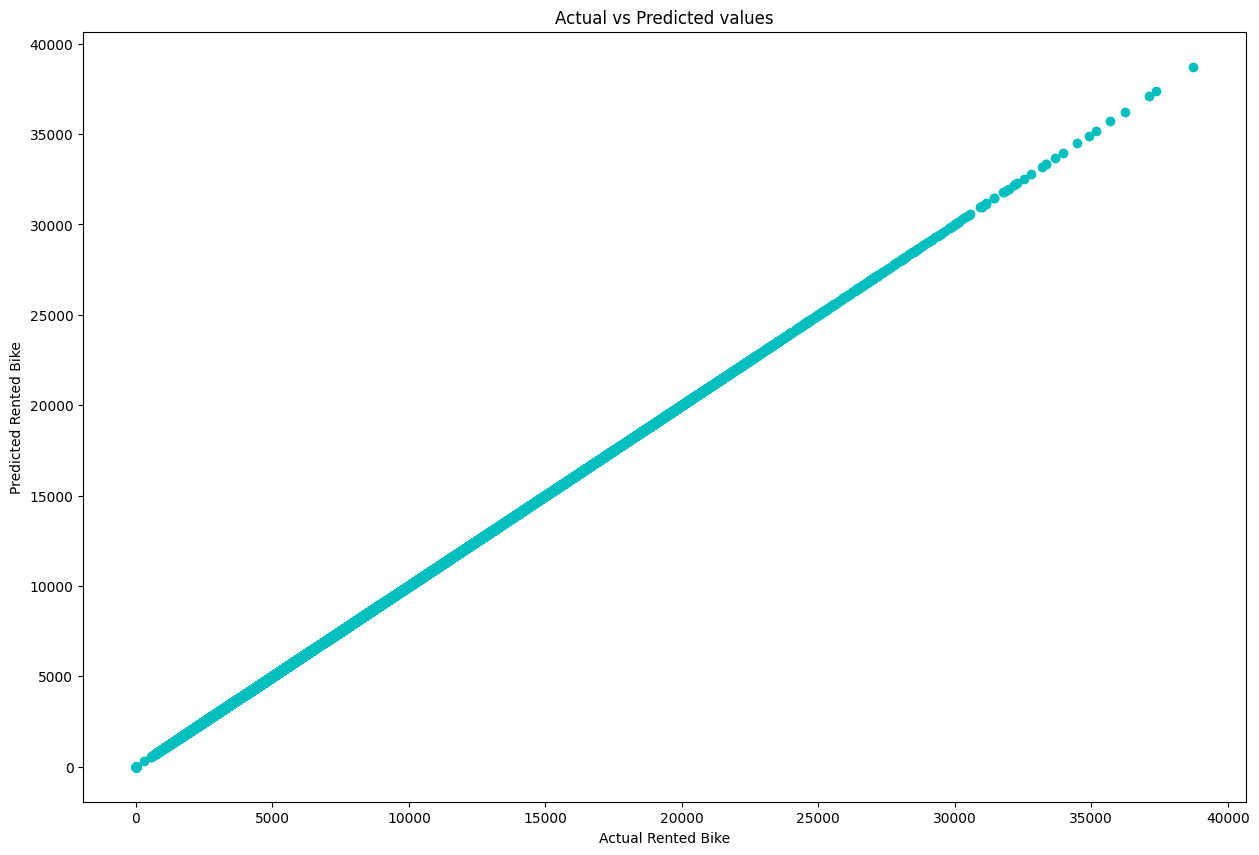

In [280]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_linear,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

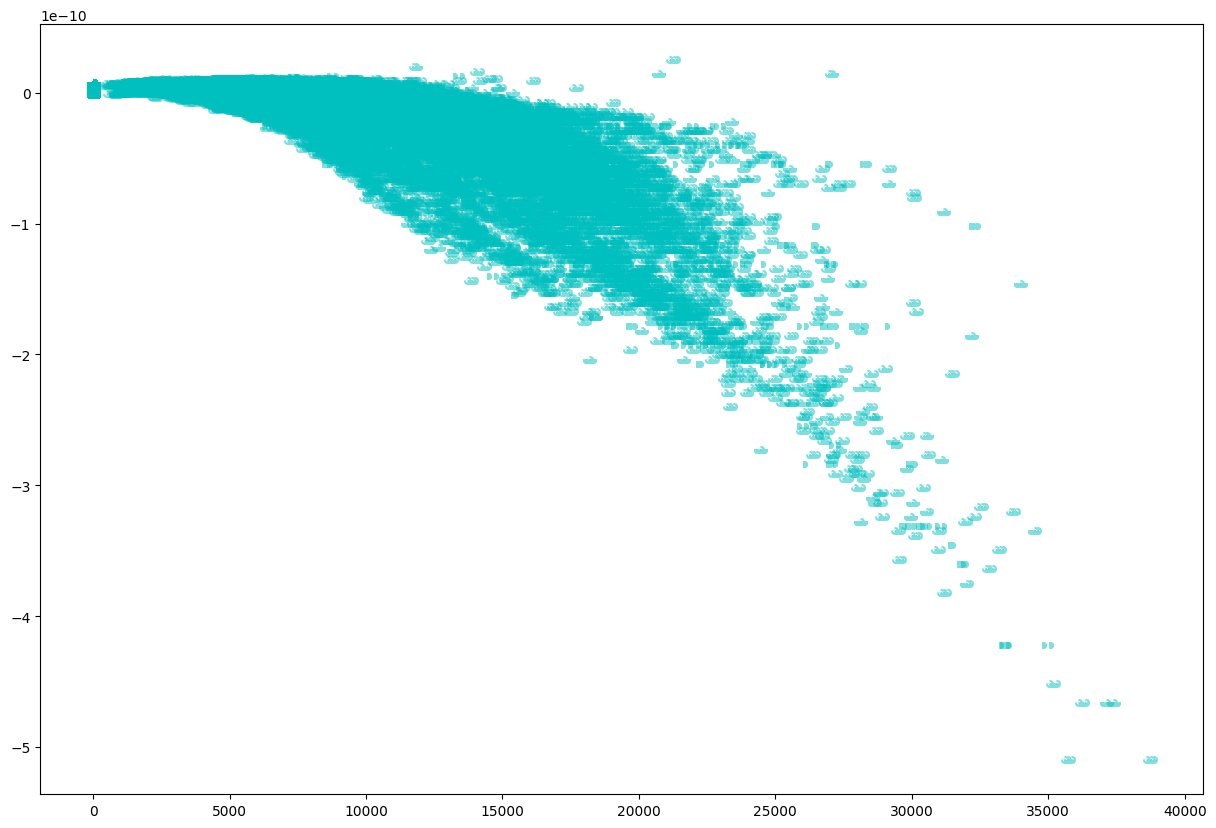

In [281]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_linear,y_test-y_pred_test_linear,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

In [282]:
#storing 100 observations for analysis
simple_lr_pred = y_pred_test_linear[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred})

In [283]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

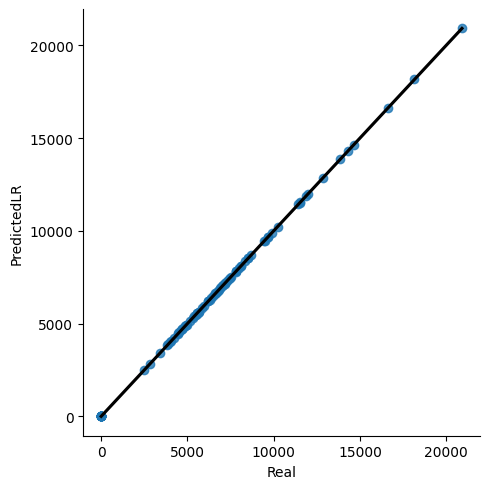

In [284]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

**Inferences On Linear Regression Coefficients**

In [285]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.151e+29
Date:                Mon, 01 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:52:02   Log-Likelihood:             1.8681e+07
No. Observations:             1017209   AIC:                        -3.736e+07
Df Residuals:                 1017188   BIC:                        -3.736e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.025e-09   6.85e-09      0.441      0.659   -1.04e-08    1.65e-08
Store                 4.177e-15   7.89e-15      0.529      0.597   -1.13e-14    1.96e-14
DayOfWeek             9.328e-13   1.67e-12      0.557      0.578   -2.35e-12    4.21e-12
Sales                    1.0000   4.51e-15   2.22e+14      0.000       1.000       1.000
Customers             4.996e-16   2.21e-14      0.023      0.982   -4.28e-14    4.38e-14
Open                  -4.01e-12   3.48e-10     -0.012      0.991   -6.87e-10    6.79e-10
Promo                 7.461e-14   6.36e-12      0.012      0.991   -1.24e-11    1.25e-11
SchoolHoliday         1.465e-12   7.03e-12      0.208      0.835   -1.23e-11    1.53e-11
month                -2.973e-13   3.13e-12     -0.095      0.924   -6.43e-12    5.83e-12
day                   5.684e-14   3.02e-13      0.188      0.851   -5.34e-13    6.48e-13
year                 -2.769e-12    3.4e-12     -0.814      0.416   -9.44e-12     3.9e-12
week_of_year         -2.204e-14   7.18e-13     -0.031      0.976   -1.43e-12    1.39e-12
TotalSales           -2.953e-18   1.32e-18     -2.239      0.025   -5.54e-18   -3.68e-19
AvgSalesPerCustomer   8.277e-14   2.39e-12      0.035      0.972    -4.6e-12    4.77e-12
HighSales              5.31e-13   1.58e-11      0.034      0.973   -3.05e-11    3.16e-11
StateHoliday_0        7.192e-20   6.12e-24   1.18e+04      0.000    7.19e-20    7.19e-20
StateHoliday_a       -3.046e-13      2e-11     -0.015      0.988   -3.96e-11     3.9e-11
StateHoliday_b         1.64e-12   3.32e-11      0.049      0.961   -6.34e-11    6.67e-11
StateHoliday_c       -1.465e-12   4.16e-11     -0.035      0.972    -8.3e-11    8.01e-11
SalesCategory_Medium  1.919e-12   3.49e-10      0.006      0.996   -6.82e-10    6.86e-10
SalesCategory_Low      1.61e-12   3.49e-10      0.005      0.996   -6.82e-10    6.85e-10
SalesCategory_High    1.035e-12    3.5e-10      0.003      0.998   -6.84e-10    6.86e-10
==============================================================================
Omnibus:                  1137849.556   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        154131095.445
Skew:                           5.680   Prob(JB):                         0.00
Kurtosis:                      62.224   Cond. No.                     2.10e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###2. Decision Tree Regression

In [286]:
#Fit Model
dec_regressor = DecisionTreeRegressor(max_depth=10,max_features=10, max_leaf_nodes=200,random_state=0)
dec_regressor=dec_regressor.fit(X_train, y_train)

In [287]:
#Predict train & test values
y_pred_train_dec = dec_regressor.predict(X_train)
y_pred_test_dec = dec_regressor.predict(X_test)

In [288]:
#checking the score
print("The train score is :", round(dec_regressor.score(X_train, y_train),2))
print("The test score is :", round(dec_regressor.score(X_test, y_test),2))

The train score is : 1.0
The test score is : 1.0


In [289]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_dec_train= mean_squared_error(y_train, y_pred_train_dec)
print("MSE :",MSE_dec_train)

#calculate RMSE
RMSE_dec_train=np.sqrt(MSE_dec_train)
print("RMSE :",RMSE_dec_train)

#calculate MAE
MAE_dec_train= mean_absolute_error(y_train, y_pred_train_dec)
print("MAE :",MAE_dec_train)

#calculate r2 and adjusted r2
R2_dec_train= r2_score(y_train,y_pred_train_dec)
print("R2 :",R2_dec_train)

Adjusted_R2_dec_train = (1-(1-r2_score(y_train, y_pred_train_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_dec_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_dec_test= mean_squared_error(y_test, y_pred_test_dec)
print("MSE :",MSE_dec_test)

#calculate RMSE
RMSE_dec_test=np.sqrt(MSE_dec_test)
print("RMSE :",RMSE_dec_test)

#calculate MAE
MAE_dec_test= mean_absolute_error(y_test, y_pred_test_dec)
print("MAE :",MAE_dec_test)

#calculate r2 and adjusted r2
R2_dec_test= r2_score(y_test, y_pred_test_dec)
print("R2 :",R2_dec_test)

Adjusted_R2_dec_test = (1-(1-r2_score(y_test, y_pred_test_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_dec_test)

Evaluation metrics for training data

MSE : 39355.45274759431
RMSE : 198.3820877690179
MAE : 113.88249902745605
R2 : 0.9973502684131171
Adjusted R2 : 0.997350086056884
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 40160.08283098879
RMSE : 200.3998074624544
MAE : 114.3845513679084
R2 : 0.9972773332262181
Adjusted R2 : 0.9972771458505385


Text(0.5, 1.0, 'Actual vs Predicted values')

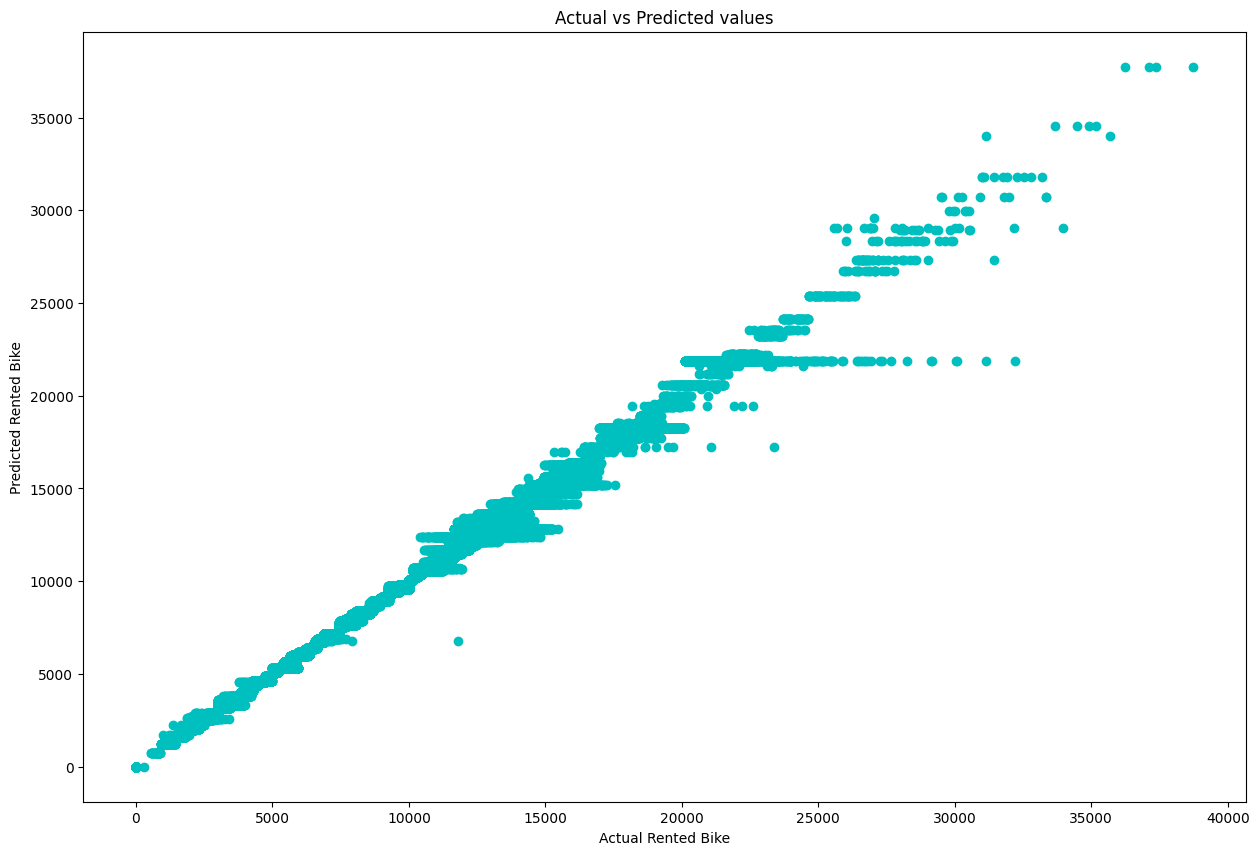

In [290]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_dec,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

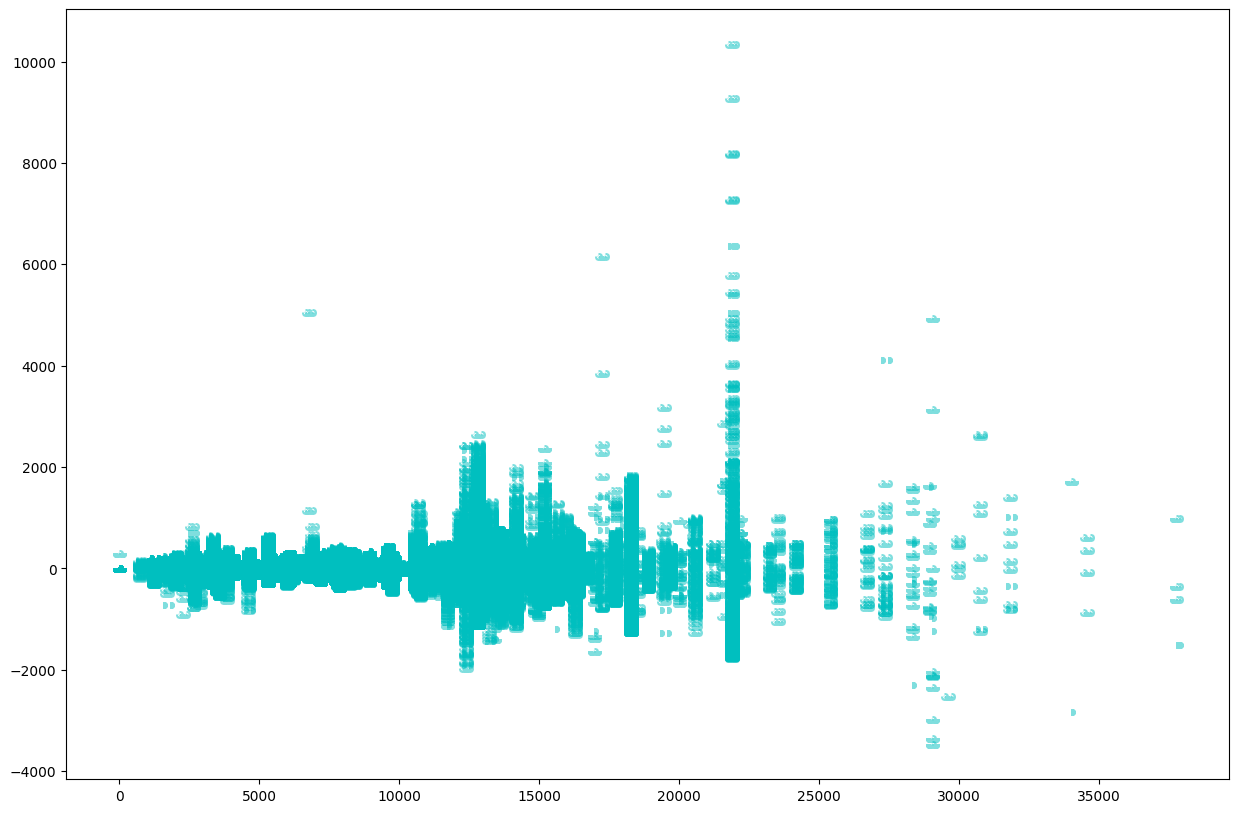

In [291]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_dec,y_test-y_pred_test_dec,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

###3. Random Forest Regressor

In [292]:
# Creating the Random Forest model with default hyperparameters
rf_model = RandomForestRegressor()
# Fitting the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [293]:
# Predict train & test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [294]:
# Checking the score
print("The train score is :", round(rf_model.score(X_train, y_train), 2))
print("The test score is :", round(rf_model.score(X_test, y_test), 2))

The train score is : 1.0
The test score is : 1.0


In [295]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_rf_train= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE_rf_train)

#calculate RMSE
RMSE_rf_train=np.sqrt(MSE_rf_train)
print("RMSE :",RMSE_rf_train)

#calculate MAE
MAE_rf_train= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf_train)

#calculate r2 and adjusted r2
R2_rf_train= r2_score(y_train,y_pred_train_rf)
print("R2 :",R2_rf_train)

Adjusted_R2_rf_train = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_rf_test= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf_test)

#calculate RMSE
RMSE_rf_test=np.sqrt(MSE_rf_test)
print("RMSE :",RMSE_rf_test)

#calculate MAE
MAE_rf_test= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf_test)

#calculate r2 and adjusted r2
R2_rf_test= r2_score(y_test, y_pred_test_rf)
print("R2 :",R2_rf_test)

Adjusted_R2_rf_test = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_rf_test)

Evaluation metrics for training data

MSE : 3.488138495125311
RMSE : 1.8676558824165952
MAE : 0.012718012600314549
R2 : 0.999999765149932
Adjusted R2 : 0.9999997651337695
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 3.3855812631282234
RMSE : 1.8399949084517118
MAE : 0.026443834934122595
R2 : 0.9999997704733415
Adjusted R2 : 0.9999997704575454


Text(0.5, 1.0, 'Actual vs Predicted values')

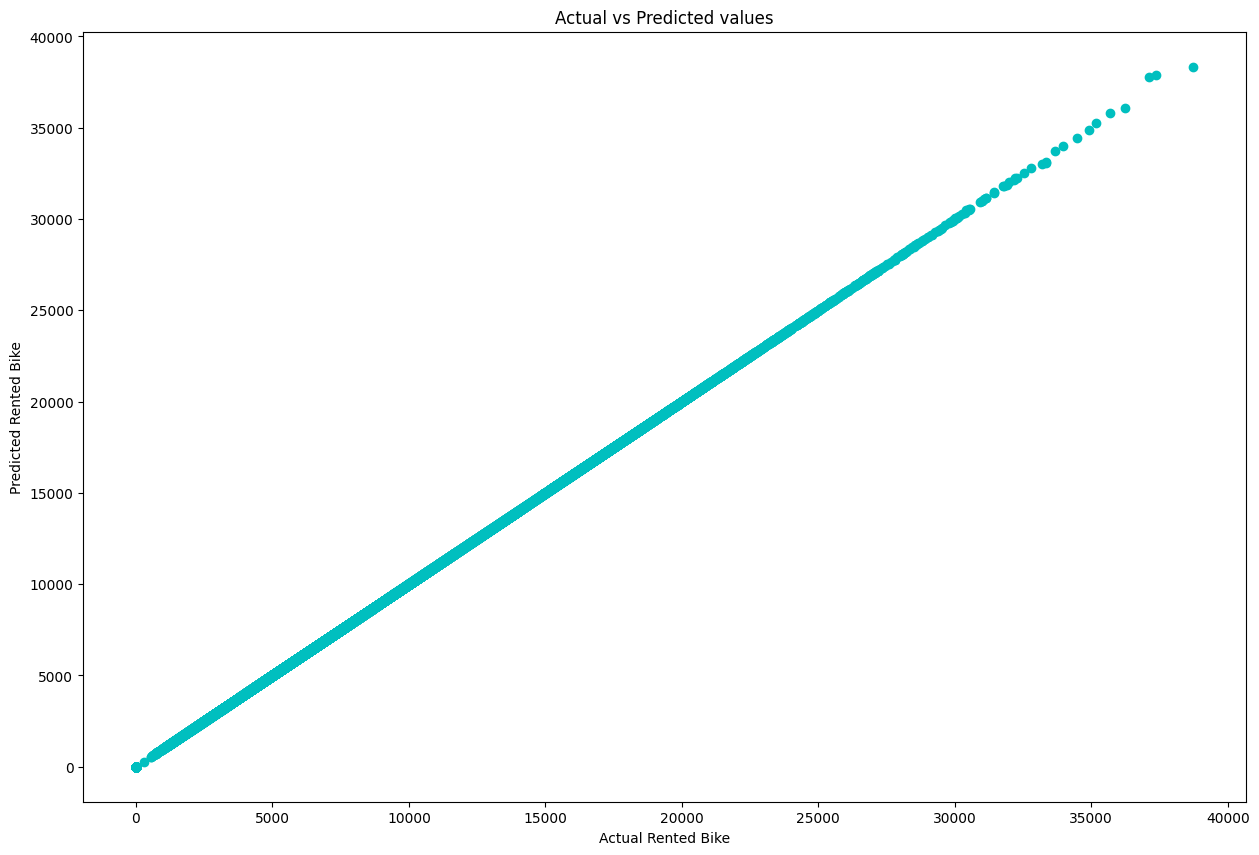

In [296]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_rf,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

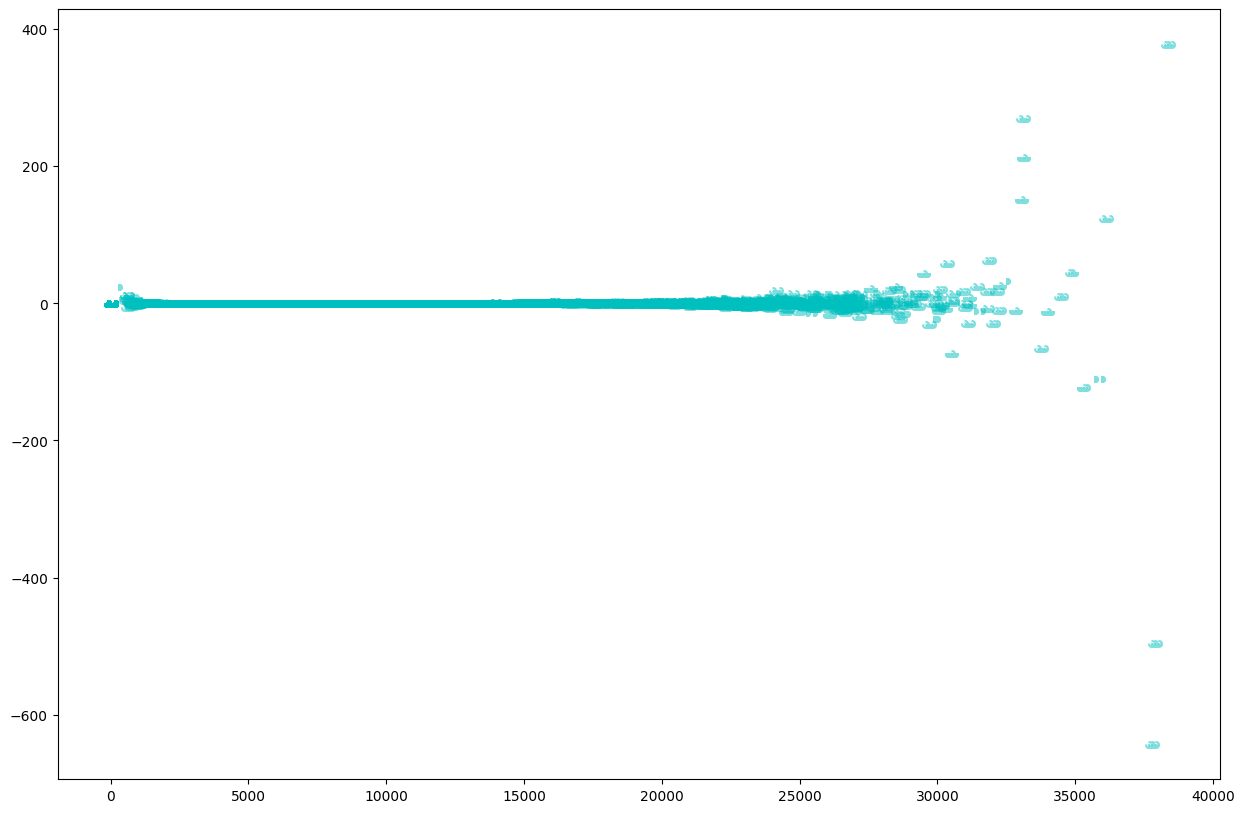

In [297]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_rf,y_test-y_pred_test_rf,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

###4. GRADIENT BOOSTING

In [298]:
# Create an instance of the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor=gb_regressor.fit(X_train,y_train)

In [299]:
#Predict train & test values
y_pred_train_gb = gb_regressor.predict(X_train)
y_pred_test_gb = gb_regressor.predict(X_test)

In [300]:
#checking the score
print("The train score is :", round(gb_regressor.score(X_train, y_train),2))
print("The test score is :", round(gb_regressor.score(X_test, y_test),2))

The train score is : 1.0
The test score is : 1.0


In [301]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_gb_train= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE_gb_train)

#calculate RMSE
RMSE_gb_train=np.sqrt(MSE_gb_train)
print("RMSE :",RMSE_gb_train)

#calculate MAE
MAE_gb_train= mean_absolute_error(y_train, y_pred_train_gb)
print("MAE :",MAE_gb_train)

#calculate r2 and adjusted r2
R2_gb_train= r2_score(y_train,y_pred_train_gb)
print("R2 :",R2_gb_train)

Adjusted_R2_gb_train = (1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_gb_test= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE_gb_test)

#calculate RMSE
RMSE_gb_test=np.sqrt(MSE_gb_test)
print("RMSE :",RMSE_gb_test)

#calculate MAE
MAE_gb_test= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE_gb_test)

#calculate r2 and adjusted r2
R2_gb_test= r2_score(y_test, y_pred_test_gb)
print("R2 :",R2_gb_test)

Adjusted_R2_gb_test = (1-(1-r2_score(y_test, y_pred_test_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_gb_test)

Evaluation metrics for training data

MSE : 1294.291397015089
RMSE : 35.976261576421315
MAE : 23.073618364091953
R2 : 0.9999128576967645
Adjusted R2 : 0.9999128516995751
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 1293.445557860909
RMSE : 35.96450413756471
MAE : 23.065726670613433
R2 : 0.9999123104088479
Adjusted R2 : 0.9999123043739938


Text(0.5, 1.0, 'Actual vs Predicted values')

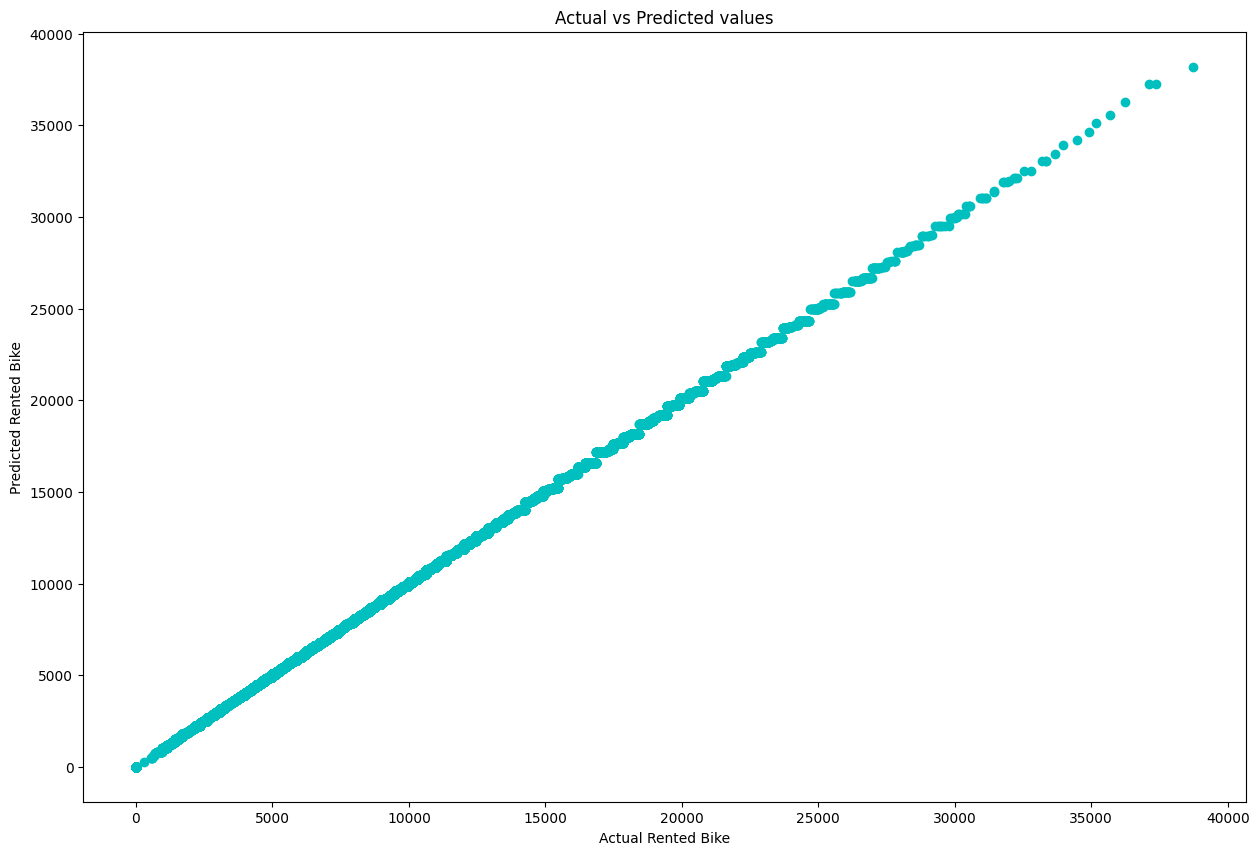

In [302]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_gb,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

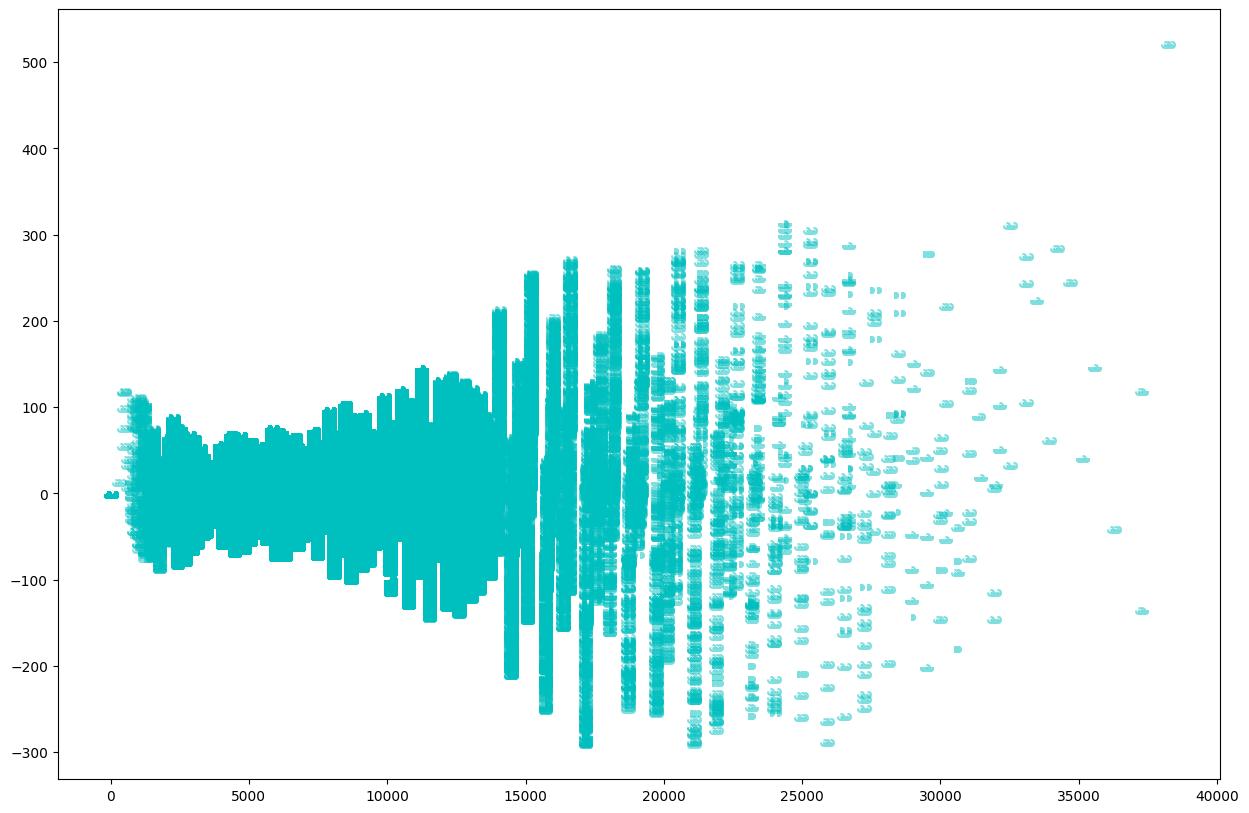

In [303]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_gb,y_test-y_pred_test_gb,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

###5. XG Boost

In [304]:
# Creating the XGBoost model with default hyperparameters
xgb_model = XGBRegressor()
# Fitting the model to the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [305]:
# Predict train & test values
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

In [306]:
# Checking the score
print("The train score is :", round(xgb_model.score(X_train, y_train), 2))
print("The test score is :", round(xgb_model.score(X_test, y_test), 2))

The train score is : 1.0
The test score is : 1.0


In [307]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_xgb_train= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :",MSE_xgb_train)

#calculate RMSE
RMSE_xgb_train=np.sqrt(MSE_xgb_train)
print("RMSE :",RMSE_xgb_train)

#calculate MAE
MAE_xgb_train= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE_xgb_train)

#calculate r2 and adjusted r2
R2_xgb_train= r2_score(y_train,y_pred_train_xgb)
print("R2 :",R2_xgb_train)

Adjusted_R2_xgb_train = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_xgb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_xgb_test= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_xgb_test)

#calculate RMSE
RMSE_xgb_test=np.sqrt(MSE_xgb_test)
print("RMSE :",RMSE_xgb_test)

#calculate MAE
MAE_xgb_test= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_xgb_test)

#calculate r2 and adjusted r2
R2_xgb_test= r2_score(y_test, y_pred_test_xgb)
print("R2 :",R2_xgb_test)

Adjusted_R2_xgb_test = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_xgb_test)

Evaluation metrics for training data

MSE : 3327.2591666872995
RMSE : 57.68239910654982
MAE : 16.97120328632136
R2 : 0.9997759816468569
Adjusted R2 : 0.9997759662297696
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 7700.647348080539
RMSE : 87.75333240441948
MAE : 18.66554422475657
R2 : 0.9994779319365583
Adjusted R2 : 0.9994778960074983


Text(0.5, 1.0, 'Actual vs Predicted values')

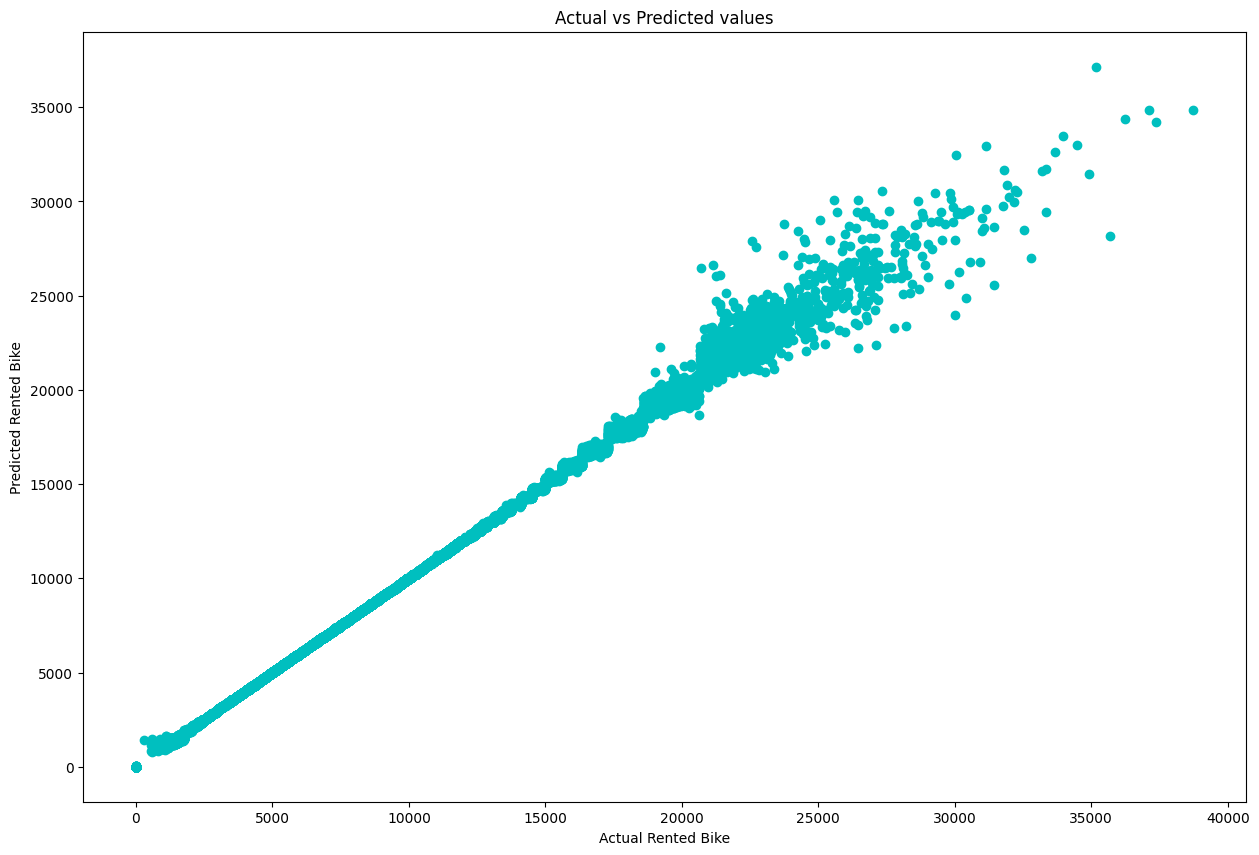

In [308]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_xgb,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

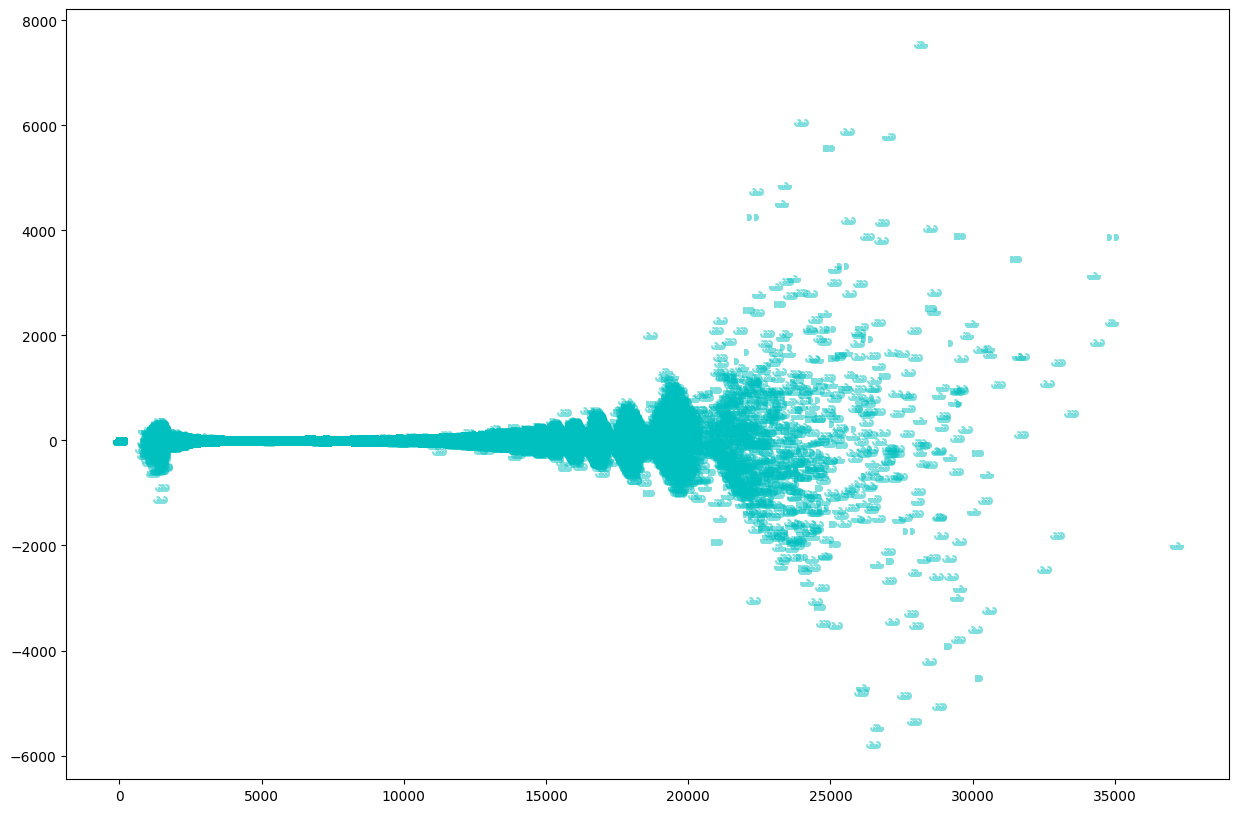

In [309]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_xgb,y_test-y_pred_test_xgb,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

###**Result of all models**

In [311]:
list_of_model = ['Linear regression','Decision Tree','Random Forest','Gradient Boosting','Extreme Gradient Boosting']

In [312]:
result_list_MSE = [MSE_linear_test,MSE_dec_test,MSE_rf_test,MSE_gb_test,MSE_xgb_test]
result_list_RMSE = [RMSE_linear_test,RMSE_dec_test,RMSE_rf_test,RMSE_gb_test,RMSE_xgb_test]
result_list_MAE = [MAE_linear_test,MAE_dec_test,MAE_rf_test,MAE_gb_test,MAE_xgb_test]
result_list_R2 = [R2_linear_test,R2_dec_test,R2_rf_test,R2_gb_test,R2_xgb_test]
relust_list_adjusted_R2=[Adjusted_R2_linear_test,Adjusted_R2_dec_test,Adjusted_R2_rf_test,Adjusted_R2_gb_test,Adjusted_R2_xgb_test]

In [313]:
# creating an empty dataframe
results_df = pd.DataFrame()

In [314]:
#adding above lists to the empty dataframe
results_df['model_name'] = list_of_model
results_df['MSE_score'] = result_list_MSE
results_df['RMSE_score'] = result_list_RMSE
results_df['MAE_score'] = result_list_MAE
results_df['R2_score'] = result_list_R2
results_df['Adjusted_R2_score'] = relust_list_adjusted_R2

In [315]:
results_df.style.hide_index().background_gradient(cmap='RdYlBu_r').format()

model_name,MSE_score,RMSE_score,MAE_score,R2_score,Adjusted_R2_score
Linear regression,0.000000,0.000000,0.000000,1.000000,1.000000
Decision Tree,40160.082831,200.399807,114.384551,0.997277,0.997277
Random Forest,3.385581,1.839995,0.026444,1.000000,1.000000
Gradient Boosting,1293.445558,35.964504,23.065727,0.999912,0.999912
Extreme Gradient Boosting,7700.647348,87.753332,18.665544,0.999478,0.999478


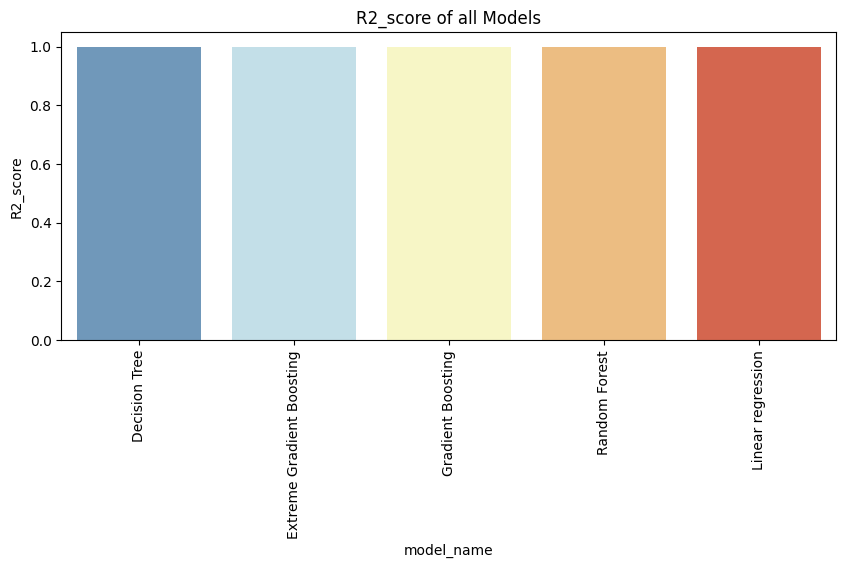

In [316]:
#creating bar plot to visualize the R2 of all the models
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x='model_name',y='R2_score',data=results_df.sort_values('R2_score'),palette="RdYlBu_r").set(title='R2_score of all Models')
plt.xticks(rotation=90);

#####Based on the provided results, it seems that all the models (Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and Extreme Gradient Boosting) are performing exceptionally well on the testing data. The evaluation metrics such as MSE, RMSE, MAE, R2, and Adjusted R2 indicate very low error and high accuracy.